In [1]:
from google.colab import drive, runtime
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install ultralytics
!pip install koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 111.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 69.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 100.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [3]:
from ultralytics import YOLO
from omegaconf import OmegaConf
import koreanize_matplotlib
from IPython.display import Image, display
import matplotlib.pyplot as plt
import glob
import itertools
import os

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
cfg_path = '/content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/configs/baseline.yaml'
cfg = OmegaConf.load(cfg_path) # Load the config file

In [5]:
print(cfg.train)

{'epochs': 60, 'imgsz': 640, 'batch': 16, 'cache': 'ram', 'seed': 42, 'multi_scale': True, 'close_mosaic': 10, 'lr0': 1e-05, 'lrf': 0.01, 'hsv_v': 0.5, 'hsv_s': 0.5, 'hsv_h': 0.5}


In [6]:
def run_train(cfg):
    # 1. 데이터 설정 (YAML 경로 또는 COCO 폴더)
    data_yaml = cfg.colab.data_yaml
    yolov8 = cfg.colab.yolov8
    project = cfg.colab.project

    epochs = cfg.train.epochs
    imgsz = cfg.train.imgsz
    batch = cfg.train.batch

    # 2. 모델 선택 (사전학습 모델 또는 커스텀 .pt)
    model = YOLO(yolov8)

    # 3. 학습 (기본 설정)
    model.train(
        data=data_yaml,
        epochs=epochs,       # 학습 Epoch 수
        imgsz=imgsz,       # 입력 이미지 크기
        batch=batch,         # 배치 사이즈
        project=project,
        seed=cfg.train.seed,
        close_mosaic=cfg.train.close_mosaic,
        lr0=cfg.train.lr0,
        lrf=cfg.train.lrf
    )

In [7]:
def run_val(cfg):

  model = YOLO(cfg.val.best_pt)
  model.val(
      data=cfg.colab.data_yaml,
      project=cfg.colab.project,
      imgsz=cfg.val.imgsz,
      batch=cfg.val.batch,

  )

## Baseline model Trian1

In [ ]:
run_train()

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/data/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/models/yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False,

100%|██████████| 22.2M/22.2M [00:00<00:00, 219MB/s]

Overriding model.yaml nc=80 with nc=73

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

 22        [15, 18, 21]  1    837205  ultralytics.nn.modules.head.Detect           [73, [64, 128, 256]]          
Model summary: 129 layers, 3,096,741 parameters, 3,096,725 gradients, 8.6 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 113MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.7±0.0 ms, read: 3.1±0.8 MB/s, size: 1801.3 KB)


train: Scanning /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/data/train/labels.cache... 1185 images, 0 backgrounds, 2 corrupt: 100%|██████████| 1185/1185 [00:00<?, ?it/s]

train: /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/data/train/images/K-003351-016262-018357_0_2_0_2_75_000_200.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     6.8878]
train: /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/data/train/images/K-003544-004543-012247-016551_0_2_0_2_70_000_200.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     7.0293]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
WARNING ⚠️ val: Slow image access detected (ping: 778.1±1738.7 ms, read: 80.5±175.2 MB/s, size: 1775.2 KB). Use local storage instead of remote/mounted storage for better performance. See https://docs.ultralytics.com/guides/model-training-tips/


val: Scanning /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/data/val/labels.cache... 298 images, 0 backgrounds, 0 corrupt: 100%|██████████| 298/298 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00013, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.21G      1.187      4.975      1.135         80        640:   3%|▎         | 2/74 [00:06<03:27,  2.88s/it]


100%|██████████| 755k/755k [00:00<00:00, 25.2MB/s]
       1/30      2.24G      0.757      4.611     0.9928         83        640: 100%|██████████| 74/74 [10:01<00:00,  8.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.18it/s]

                   all        298        907    0.00901    0.00618    0.00588    0.00548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      2.59G     0.5073      3.614     0.9318        106        640: 100%|██████████| 74/74 [00:54<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:10<00:00,  1.01s/it]


                   all        298        907      0.714     0.0708     0.0968      0.089

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.59G     0.4961      2.725     0.9626         77        640: 100%|██████████| 74/74 [00:53<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.30it/s]


                   all        298        907      0.709      0.151      0.184      0.178

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.59G     0.4656      2.159     0.9446         89        640: 100%|██████████| 74/74 [00:52<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:09<00:00,  1.04it/s]

                   all        298        907      0.679      0.246      0.266      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30       2.6G     0.4358       1.79      0.932         66        640: 100%|██████████| 74/74 [00:51<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:11<00:00,  1.16s/it]

                   all        298        907      0.515      0.391      0.384       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30       2.6G       0.41      1.554     0.9147        103        640: 100%|██████████| 74/74 [00:52<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        298        907      0.451      0.501      0.417      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30       2.6G     0.3958      1.432     0.9069         89        640: 100%|██████████| 74/74 [01:10<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:15<00:00,  1.53s/it]

                   all        298        907      0.633      0.414      0.487      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30       2.6G     0.3866      1.364     0.8993         87        640: 100%|██████████| 74/74 [00:57<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:09<00:00,  1.05it/s]

                   all        298        907      0.527      0.471      0.472       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30       2.6G     0.3717      1.274     0.8917         83        640: 100%|██████████| 74/74 [00:52<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.22it/s]

                   all        298        907      0.474      0.563      0.484       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30       2.6G     0.3684      1.203     0.8875         75        640: 100%|██████████| 74/74 [00:53<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:09<00:00,  1.01it/s]

                   all        298        907       0.43      0.543      0.454       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30       2.6G     0.3559      1.156     0.8848         68        640: 100%|██████████| 74/74 [00:52<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        298        907       0.46      0.548      0.478      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      2.61G     0.3527      1.138     0.8788         86        640: 100%|██████████| 74/74 [00:52<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:09<00:00,  1.06it/s]

                   all        298        907      0.507      0.552      0.488      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.61G     0.3532      1.093     0.8821         83        640: 100%|██████████| 74/74 [00:51<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.17it/s]


                   all        298        907      0.466      0.563      0.489      0.478

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.61G     0.3483      1.105     0.8749         65        640: 100%|██████████| 74/74 [00:53<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:09<00:00,  1.06it/s]

                   all        298        907      0.463      0.548      0.469      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      2.61G     0.3325      1.056     0.8689         69        640: 100%|██████████| 74/74 [00:53<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.16it/s]

                   all        298        907      0.457      0.519      0.464      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      2.61G     0.3291      1.023     0.8713         75        640: 100%|██████████| 74/74 [00:53<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.14it/s]

                   all        298        907      0.428       0.57      0.477      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.61G     0.3232     0.9946     0.8642         86        640: 100%|██████████| 74/74 [00:51<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:09<00:00,  1.08it/s]

                   all        298        907      0.446      0.574      0.476      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      2.61G     0.3195      1.008     0.8663         83        640: 100%|██████████| 74/74 [00:52<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.25it/s]

                   all        298        907      0.468      0.558      0.493      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      2.61G      0.317     0.9724     0.8683         75        640: 100%|██████████| 74/74 [00:53<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:09<00:00,  1.07it/s]

                   all        298        907      0.421      0.586      0.481      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.61G     0.3133     0.9627      0.864        104        640: 100%|██████████| 74/74 [00:53<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:09<00:00,  1.07it/s]

                   all        298        907      0.426      0.564      0.476      0.468


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      2.61G       0.26      1.016     0.8349         45        640: 100%|██████████| 74/74 [00:55<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:09<00:00,  1.09it/s]

                   all        298        907       0.48      0.562      0.482      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      2.61G      0.244     0.9624     0.8243         45        640: 100%|██████████| 74/74 [00:51<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.14it/s]

                   all        298        907      0.465      0.549      0.486      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      2.61G     0.2416     0.9446     0.8166         43        640: 100%|██████████| 74/74 [00:52<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.21it/s]


                   all        298        907      0.441      0.583      0.483      0.475

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.61G     0.2366     0.9493      0.826         48        640: 100%|██████████| 74/74 [00:52<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:09<00:00,  1.04it/s]

                   all        298        907      0.434      0.578      0.481      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      2.61G     0.2347     0.9269     0.8192         46        640: 100%|██████████| 74/74 [00:54<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.22it/s]

                   all        298        907      0.463      0.577      0.484      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      2.61G      0.234     0.9151     0.8212         39        640: 100%|██████████| 74/74 [00:52<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:09<00:00,  1.11it/s]

                   all        298        907      0.466      0.585      0.482      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      2.61G     0.2263     0.9056     0.8174         47        640: 100%|██████████| 74/74 [00:51<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:09<00:00,  1.10it/s]


                   all        298        907      0.473      0.591      0.483      0.476

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      2.62G     0.2244     0.8918     0.8164         50        640: 100%|██████████| 74/74 [00:52<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.12it/s]

                   all        298        907      0.459      0.586      0.483      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      2.64G     0.2251     0.8992     0.8212         43        640: 100%|██████████| 74/74 [00:50<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:09<00:00,  1.08it/s]

                   all        298        907      0.454      0.586      0.486      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      2.66G     0.2249     0.8879      0.811         49        640: 100%|██████████| 74/74 [00:54<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.28it/s]


                   all        298        907      0.458      0.593      0.485      0.477

30 epochs completed in 0.683 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.4MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.4MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,091,487 parameters, 0 gradients, 8.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:10<00:00,  1.02s/it]
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:498: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from font(s) DejaVu Sans.
  fig.savefig(plot_fname, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:498: UserWarning: Glyph 47161 (\N{HANGUL SYLLABLE RYEONG}) missing from font(s) DejaVu Sans.
  fig.savefig(plot_fname, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:498: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from font(s) DejaVu Sans.
  fig.savefig(plot_fname, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:498: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.savefig(plot_fname, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:498: UserWarning

                   all        298        907      0.468      0.564      0.493      0.486
            보령부스파정 5mg         27         27      0.865          1      0.927      0.912
         동아가바펜틴정 800mg         25         25      0.804          1      0.902      0.899
         낙소졸정 500/20mg          5          5      0.714          1      0.766      0.749
                  신바로정          5          5      0.517      0.862      0.649      0.649
             울트라셋이알서방정          4          4      0.218          1      0.845      0.817
         비모보정 500/20mg          5          5      0.924          1      0.995      0.995
                  레일라정          5          5       0.94          1      0.995      0.995
              놀텍정 10mg          4          4          1      0.949      0.995       0.92
           에스원엠프정 20mg          9          9      0.746          1      0.818      0.791
             케이캡정 50mg         14         14          1      0.428       0.99       0.96
                  알드린

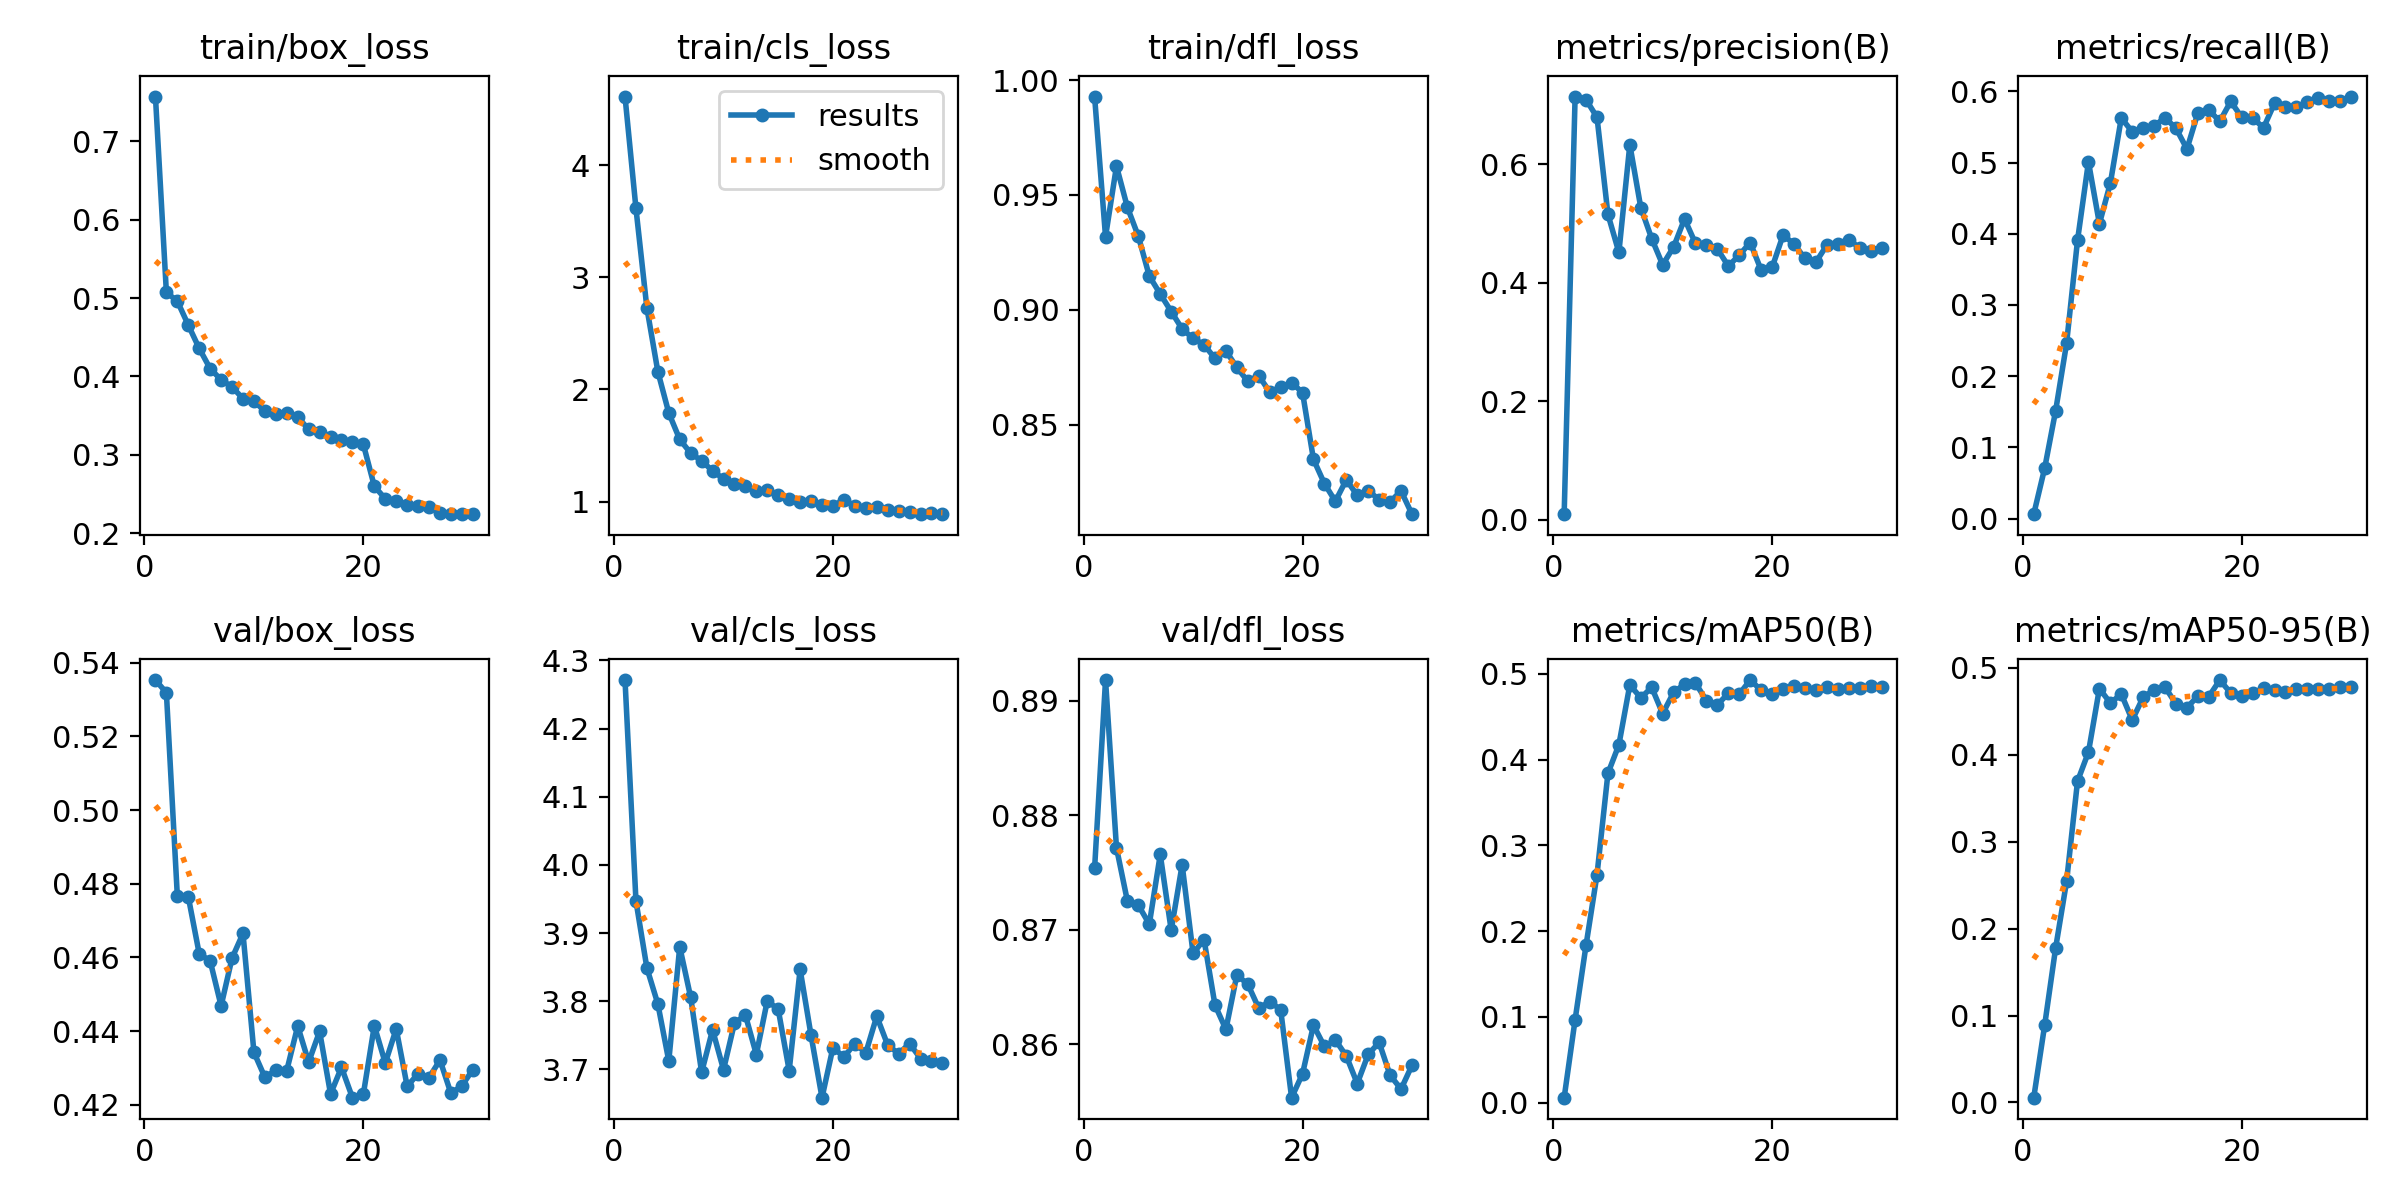

In [ ]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

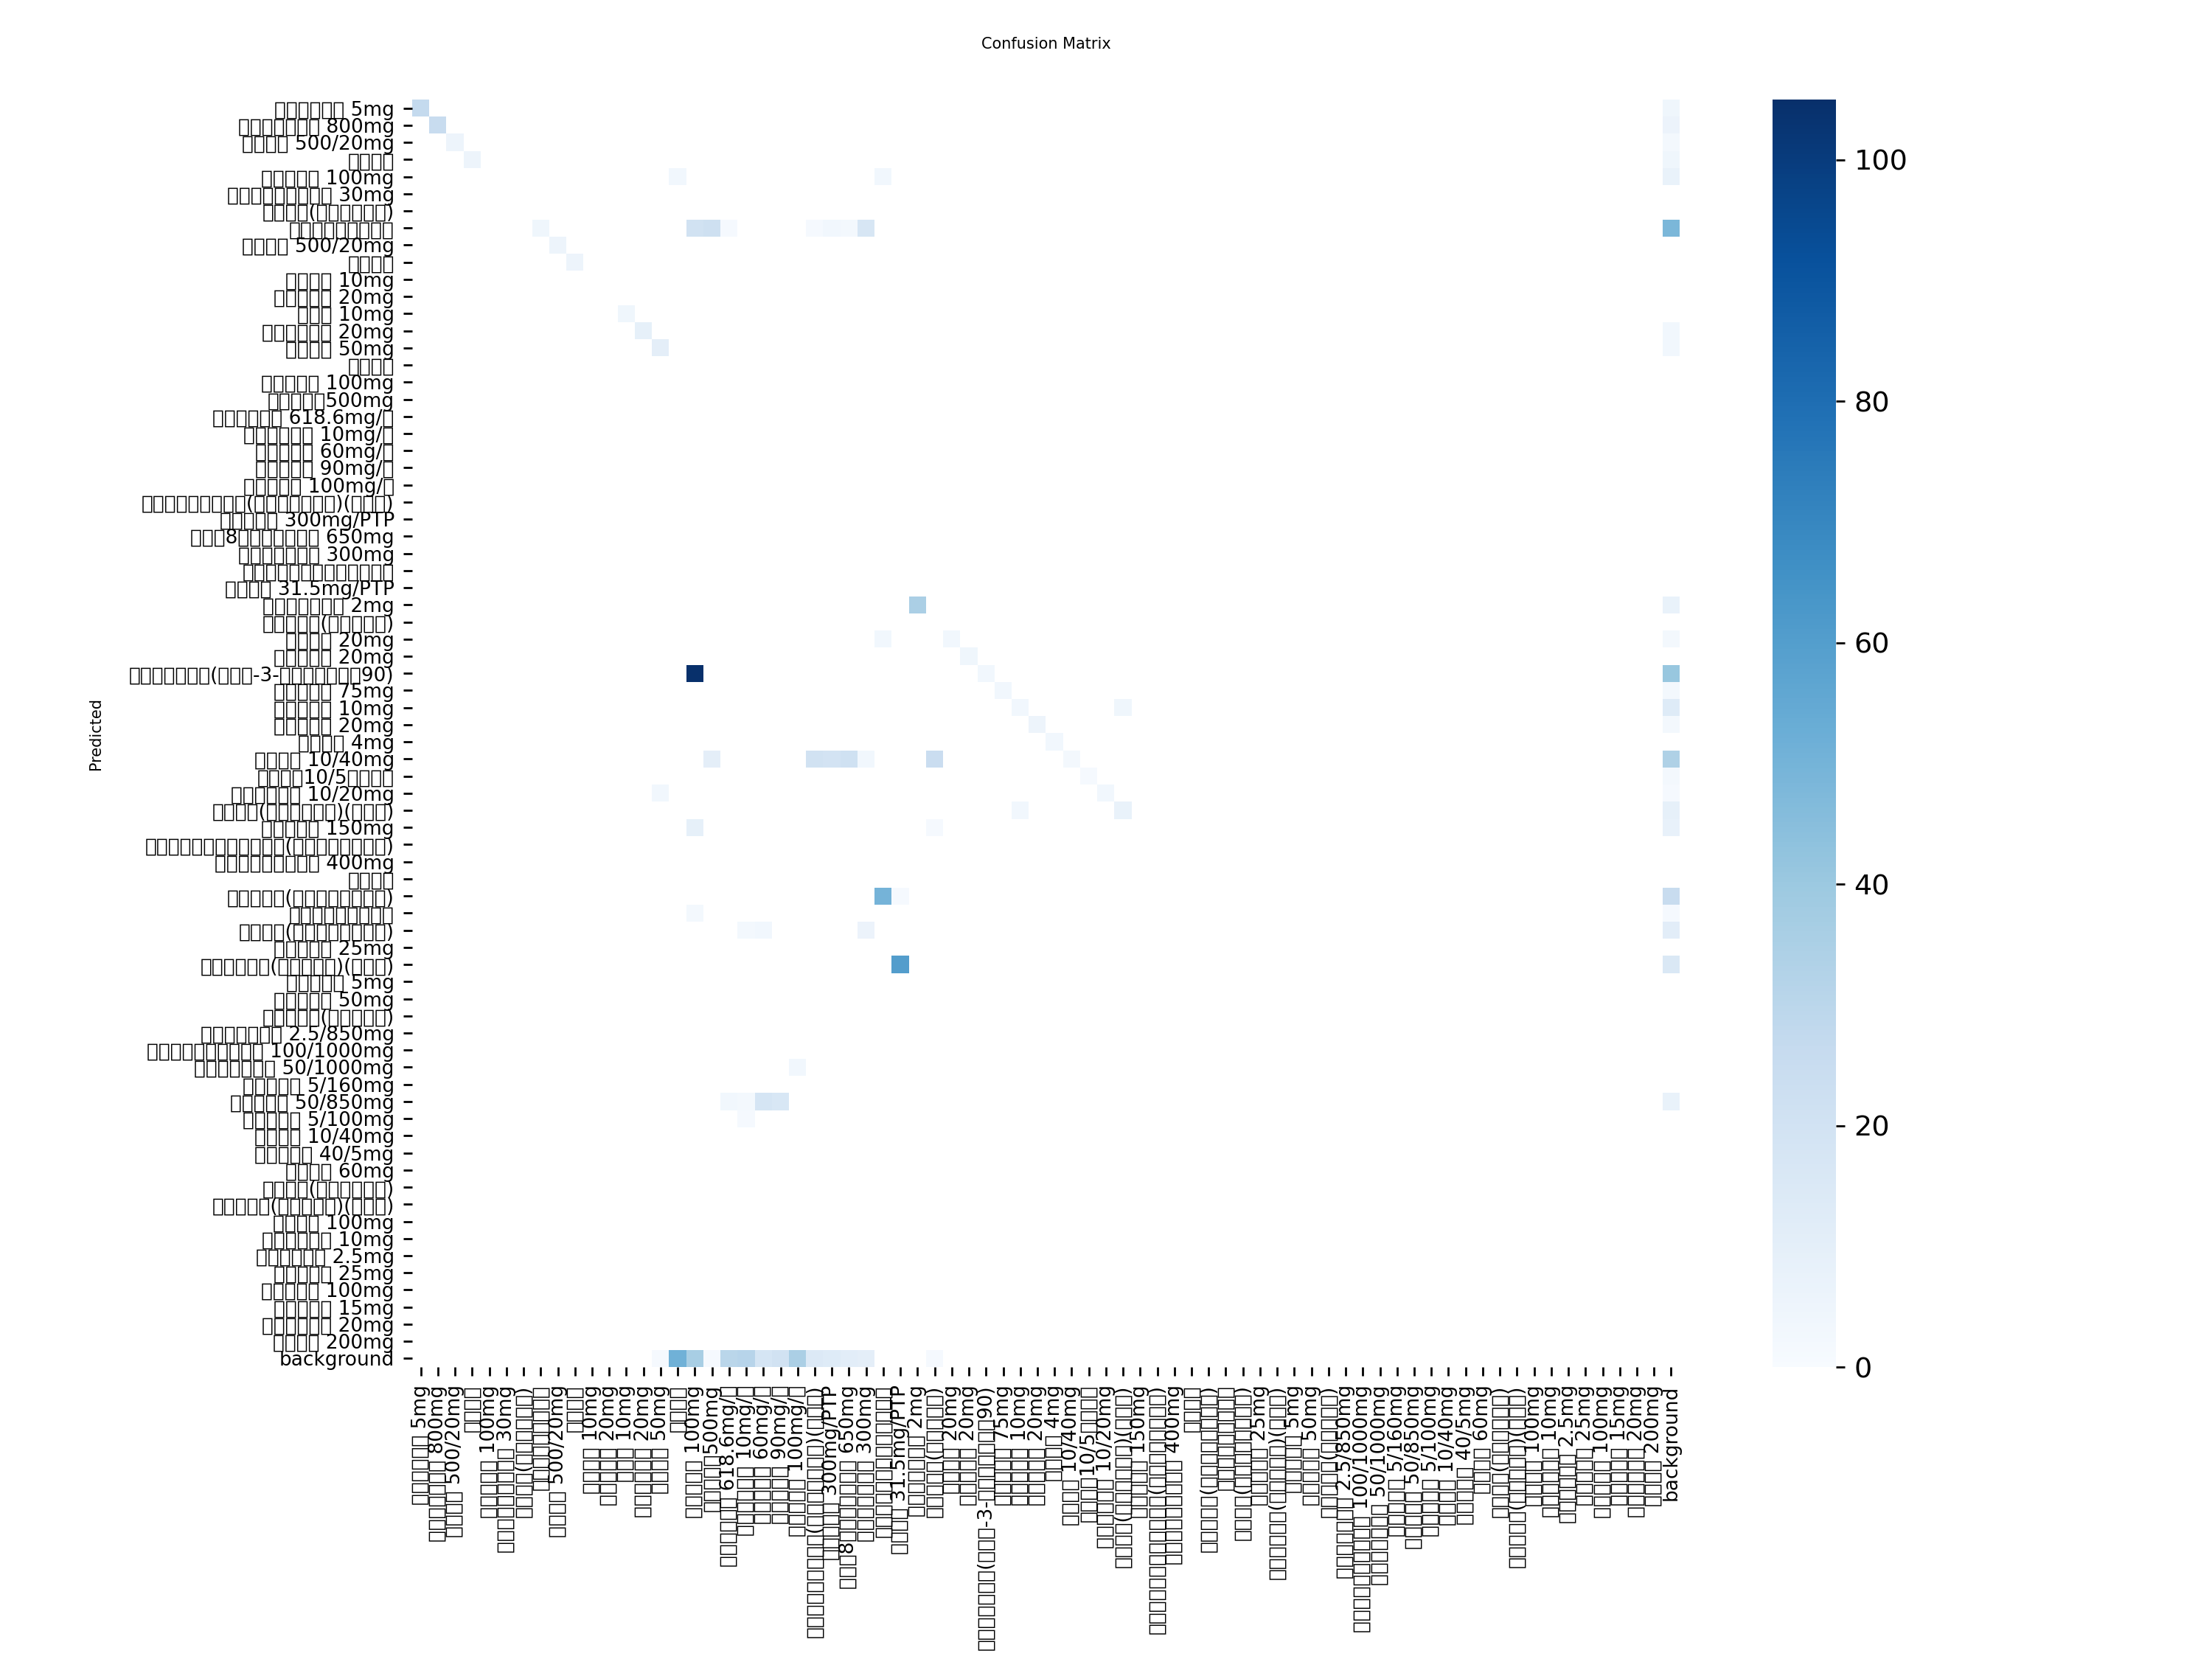

In [ ]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

In [ ]:
!yolo task=detect mode=val \
    model="/content/runs/detect/train/weights/best.pt" \
    data="/content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/data/data.yaml" \
    plots=True

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,091,487 parameters, 0 gradients, 8.5 GFLOPs
val: Fast image access ✅ (ping: 0.5±0.1 ms, read: 274.2±78.3 MB/s, size: 1779.4 KB)
val: Scanning /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/data/val/labels.cache... 298 images, 0 backgrounds, 0 corrupt: 100% 298/298 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 19/19 [00:11<00:00,  1.65it/s]
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:498: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from font(s) DejaVu Sans.
  fig.savefig(plot_fname, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:498: UserWarning: Glyph 47161 (\N{HANGUL SYLLABLE RYEONG}) missing from font(s) DejaVu Sans.
  fig.savefig(plot_fname, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultraly

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt source="/content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/data/test/images"

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,091,487 parameters, 0 gradients, 8.5 GFLOPs

image 1/843 /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/data/test/images/1.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 울트라셋이알서방정, 1 놀텍정 10mg, 40.4ms
image 2/843 /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/data/test/images/10.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 레일라정, 1 라비에트정 20mg, 13.3ms
image 3/843 /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/data/test/images/100.png: 640x512 1 보령부스파정 5mg, 1 신바로정, 1 가바토파정 100mg, 7.2ms
image 4/843 /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/data/test/images/1003.png: 640x512 1 리피토정 20mg, 1 기넥신에프정(은행엽엑스)(수출용), 1 제미메트서방정 50/1000mg, 1 트윈스타정 40/5mg, 7.5ms
image 5/843 /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/be

In [ ]:
count = 0
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg'):
  if count == 10:
    break
  count += 1
  display(Image(filename=image_path, width=1000))
  print("\n")

Output hidden; open in https://colab.research.google.com to view.

## Baseline model Train2 -> label txt 균등한 분배 이후 학습
epochs: 30

imgsz: 640

batch: 64

In [ ]:
run_train()

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=64, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/data/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/models/yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False,

100%|██████████| 22.2M/22.2M [00:00<00:00, 345MB/s]

Overriding model.yaml nc=80 with nc=73

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

 22        [15, 18, 21]  1    837205  ultralytics.nn.modules.head.Detect           [73, [64, 128, 256]]          
Model summary: 129 layers, 3,096,741 parameters, 3,096,725 gradients, 8.6 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 362MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.6±0.1 ms, read: 2.3±0.3 MB/s, size: 1798.5 KB)


train: Scanning /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/data/train/labels... 1186 images, 0 backgrounds, 1 corrupt: 100%|██████████| 1186/1186 [22:13<00:00,  1.12s/it]

train: /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/data/train/images/K-003544-004543-012247-016551_0_2_0_2_70_000_200.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     7.0293]


train: New cache created: /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/data/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 1.9±1.5 ms, read: 2.3±0.4 MB/s, size: 1745.0 KB)


val: Scanning /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/data/val/labels... 297 images, 0 backgrounds, 1 corrupt: 100%|██████████| 297/297 [04:16<00:00,  1.16it/s]

val: /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/data/val/images/K-003351-016262-018357_0_2_0_2_75_000_200.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     6.8878]
val: New cache created: /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/data/val/labels.cache


Plotting labels to /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/checkpoints/runs/train/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00013, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/checkpoints/runs/train/train2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      8.32G      1.252      4.938      1.215        348        640:  16%|█▌        | 3/19 [00:05<00:28,  1.79s/it]

       1/30      8.62G      1.253      4.933      1.211        354        640:  21%|██        | 4/19 [00:07<00:26,  1.75s/it]
100%|██████████| 755k/755k [00:00<00:00, 93.7MB/s]
       1/30      8.65G      1.106      4.871      1.143        202        640: 100%|██████████| 19/19 [01:02<00:00,  3.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.09s/it]

                   all        296        870          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      8.35G     0.5947      4.454     0.9346        198        640: 100%|██████████| 19/19 [00:52<00:00,  2.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:08<00:00,  2.78s/it]

                   all        296        870     0.0104    0.00314    0.00665    0.00613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      8.34G     0.5332      3.931     0.9357        197        640: 100%|██████████| 19/19 [00:51<00:00,  2.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.64s/it]

                   all        296        870     0.0295      0.104     0.0465     0.0438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      8.35G     0.5156      3.324     0.9542        200        640: 100%|██████████| 19/19 [00:51<00:00,  2.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.64s/it]

                   all        296        870     0.0536      0.332      0.127       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      8.36G     0.4835      2.716     0.9508        176        640: 100%|██████████| 19/19 [00:54<00:00,  2.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]


                   all        296        870      0.856      0.141      0.297      0.281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      8.36G     0.4456      2.155     0.9232        219        640: 100%|██████████| 19/19 [00:53<00:00,  2.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]


                   all        296        870      0.708      0.416       0.46      0.437

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      8.36G      0.438      1.802     0.9238        159        640: 100%|██████████| 19/19 [00:52<00:00,  2.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.28s/it]


                   all        296        870      0.634      0.587      0.541       0.52

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      8.34G     0.4113      1.584     0.9077        202        640: 100%|██████████| 19/19 [00:52<00:00,  2.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]


                   all        296        870      0.627      0.693      0.617      0.588

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      8.34G     0.3998      1.437     0.9015        184        640: 100%|██████████| 19/19 [00:51<00:00,  2.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]


                   all        296        870      0.649      0.722      0.677      0.653

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      8.36G     0.3857      1.355     0.8915        187        640: 100%|██████████| 19/19 [00:49<00:00,  2.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.55s/it]


                   all        296        870       0.61      0.805      0.726      0.702

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      8.37G      0.377      1.275     0.8884        171        640: 100%|██████████| 19/19 [00:52<00:00,  2.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]


                   all        296        870      0.691      0.791      0.739      0.714

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      8.34G     0.3713      1.212     0.8847        173        640: 100%|██████████| 19/19 [00:48<00:00,  2.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.30s/it]


                   all        296        870      0.671      0.823      0.759      0.731

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      8.37G     0.3683      1.168     0.8833        184        640: 100%|██████████| 19/19 [00:52<00:00,  2.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]


                   all        296        870      0.641      0.871      0.765      0.744

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      8.37G     0.3545      1.123     0.8743        189        640: 100%|██████████| 19/19 [00:51<00:00,  2.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.89s/it]


                   all        296        870      0.713      0.819      0.802      0.778

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      8.36G     0.3498      1.102     0.8715        218        640: 100%|██████████| 19/19 [00:50<00:00,  2.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.90s/it]


                   all        296        870      0.684      0.885       0.81      0.783

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      8.38G     0.3406      1.058     0.8681        212        640: 100%|██████████| 19/19 [00:49<00:00,  2.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.95s/it]


                   all        296        870      0.729      0.882      0.809      0.788

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      8.37G     0.3393      1.038     0.8593        183        640: 100%|██████████| 19/19 [00:50<00:00,  2.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.84s/it]


                   all        296        870      0.677      0.919      0.815      0.795

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      8.34G     0.3401      1.045     0.8728        176        640: 100%|██████████| 19/19 [00:49<00:00,  2.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.94s/it]


                   all        296        870      0.691      0.924      0.806      0.787

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      8.36G     0.3291      1.003     0.8654        229        640: 100%|██████████| 19/19 [00:48<00:00,  2.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.82s/it]

                   all        296        870      0.754       0.87       0.82        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      8.34G     0.3307     0.9876     0.8707        152        640: 100%|██████████| 19/19 [00:49<00:00,  2.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.99s/it]


                   all        296        870       0.72      0.887      0.835      0.815
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      8.19G     0.2762      1.066     0.8319         94        640: 100%|██████████| 19/19 [01:03<00:00,  3.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]


                   all        296        870      0.691      0.919      0.819        0.8

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      8.19G     0.2583      1.005     0.8278        100        640: 100%|██████████| 19/19 [00:46<00:00,  2.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.69s/it]


                   all        296        870       0.67      0.954      0.832      0.812

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      8.18G     0.2518      0.995     0.8328        104        640: 100%|██████████| 19/19 [00:48<00:00,  2.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.72s/it]


                   all        296        870      0.724      0.921      0.833      0.815

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      8.19G      0.251     0.9652     0.8275         99        640: 100%|██████████| 19/19 [00:48<00:00,  2.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.78s/it]


                   all        296        870      0.734      0.943      0.849      0.831

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      8.19G     0.2464     0.9626     0.8276        100        640: 100%|██████████| 19/19 [00:49<00:00,  2.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]


                   all        296        870      0.714      0.964      0.848      0.827

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      8.18G     0.2415     0.9413     0.8227        102        640: 100%|██████████| 19/19 [00:46<00:00,  2.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.29s/it]


                   all        296        870      0.724      0.973      0.851      0.834

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      8.19G     0.2394     0.9242     0.8239        105        640: 100%|██████████| 19/19 [00:47<00:00,  2.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.28s/it]


                   all        296        870      0.732      0.975      0.851      0.835

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      8.19G     0.2353     0.9062      0.821        105        640: 100%|██████████| 19/19 [00:49<00:00,  2.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.27s/it]


                   all        296        870      0.728      0.978      0.853      0.837

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      8.19G     0.2342     0.9172     0.8242         99        640: 100%|██████████| 19/19 [00:48<00:00,  2.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.75s/it]


                   all        296        870      0.728      0.979      0.854      0.839

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      8.19G     0.2344     0.9084     0.8197         99        640: 100%|██████████| 19/19 [00:49<00:00,  2.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.72s/it]


                   all        296        870      0.738      0.974      0.857      0.842

30 epochs completed in 0.492 hours.
Optimizer stripped from /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/checkpoints/runs/train/train2/weights/last.pt, 6.4MB
Optimizer stripped from /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/checkpoints/runs/train/train2/weights/best.pt, 6.4MB

Validating /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/checkpoints/runs/train/train2/weights/best.pt...
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,091,487 parameters, 0 gradients, 8.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:10<00:00,  3.63s/it]


                   all        296        870      0.738      0.974      0.859      0.844
            보령부스파정 5mg         34         34      0.819          1      0.871      0.857
         동아가바펜틴정 800mg         24         24      0.642          1      0.766       0.75
         낙소졸정 500/20mg          5          5      0.585          1      0.938      0.905
                  신바로정          8          8      0.696          1      0.768      0.768
           가바토파정 100mg         22         22      0.747          1      0.931       0.92
        란스톤엘에프디티정 30mg          4          4      0.537          1       0.59      0.551
          펠루비정(펠루비프로펜)          5          5      0.773          1      0.995      0.995
             울트라셋이알서방정          4          4      0.538          1      0.895      0.895
         비모보정 500/20mg          6          6      0.675          1      0.924      0.924
                  레일라정          5          5      0.587          1       0.77       0.77
             스토가정 10m

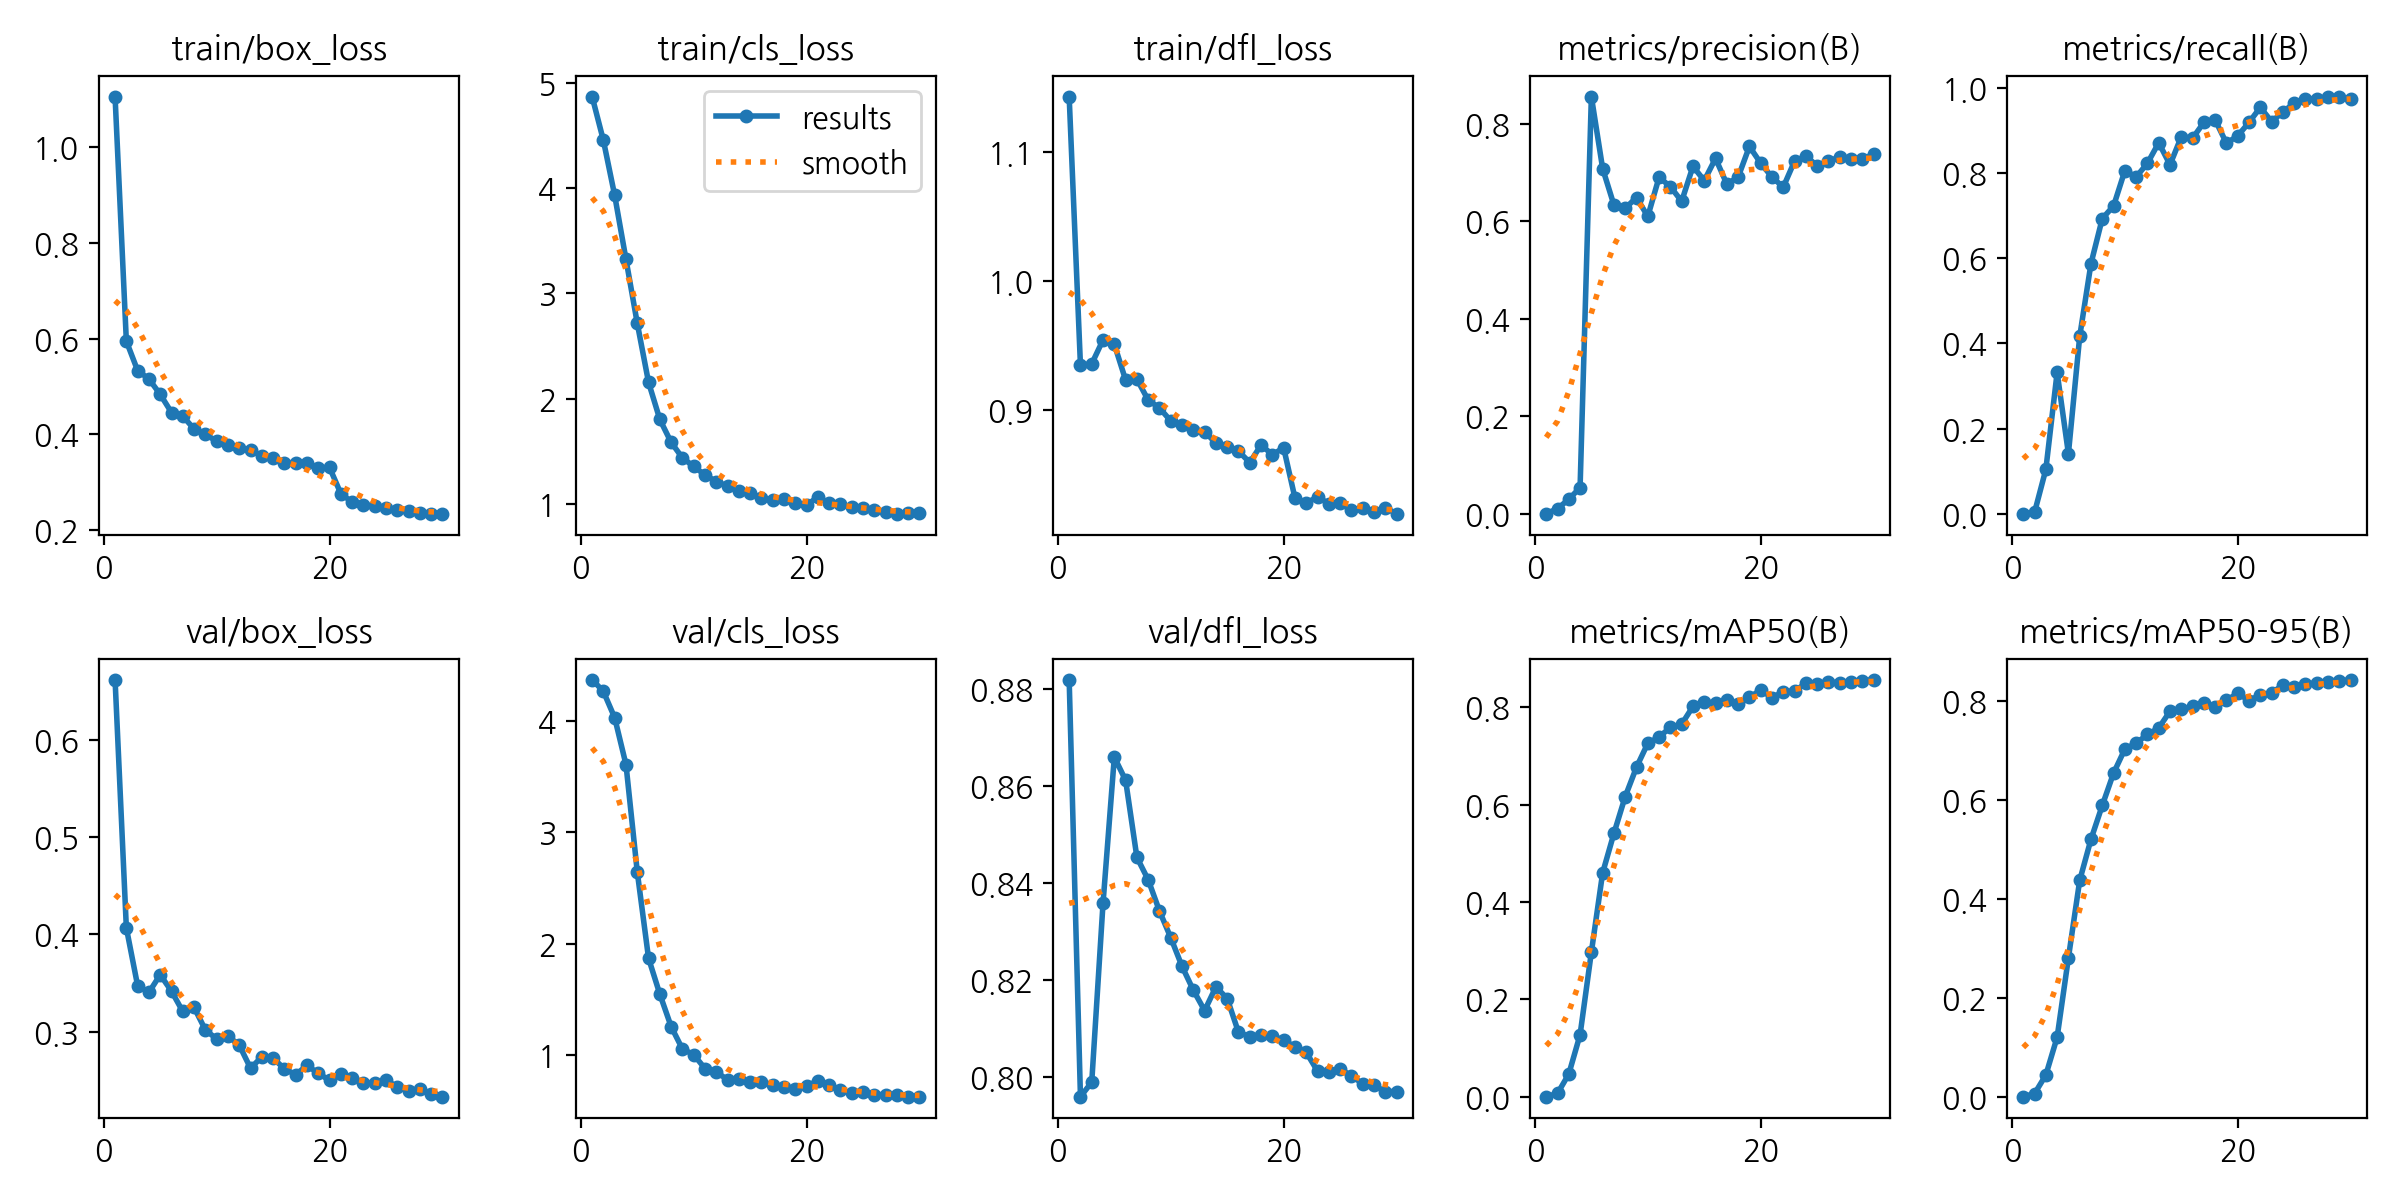

In [ ]:
Image(filename=f'/content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/checkpoints/runs/train/train2/results.png', width=600)

### val

In [ ]:
cfg_path = '/content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/configs/baseline.yaml'
cfg = OmegaConf.load(cfg_path) # Load the config file

In [ ]:
run_val(cfg)

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,091,487 parameters, 0 gradients, 8.5 GFLOPs


100%|██████████| 22.2M/22.2M [00:00<00:00, 105MB/s] 


val: Fast image access ✅ (ping: 0.6±0.2 ms, read: 159.9±215.5 MB/s, size: 1771.8 KB)


val: Scanning /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/data/val/labels.cache... 297 images, 0 backgrounds, 1 corrupt: 100%|██████████| 297/297 [00:00<?, ?it/s]

val: /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/data/val/images/K-003351-016262-018357_0_2_0_2_75_000_200.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     6.8878]



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:09<00:00,  1.94s/it]


                   all        296        870      0.738      0.973      0.856      0.842
            보령부스파정 5mg         34         34      0.819          1      0.871      0.857
         동아가바펜틴정 800mg         24         24      0.642          1      0.766       0.75
         낙소졸정 500/20mg          5          5      0.586          1      0.938      0.905
                  신바로정          8          8      0.696          1      0.768      0.768
           가바토파정 100mg         22         22      0.747          1      0.932      0.916
        란스톤엘에프디티정 30mg          4          4      0.537          1       0.59      0.551
          펠루비정(펠루비프로펜)          5          5      0.773          1      0.995      0.995
             울트라셋이알서방정          4          4      0.538          1      0.895      0.895
         비모보정 500/20mg          6          6      0.677          1      0.924      0.924
                  레일라정          5          5      0.588          1       0.77       0.77
             스토가정 10m

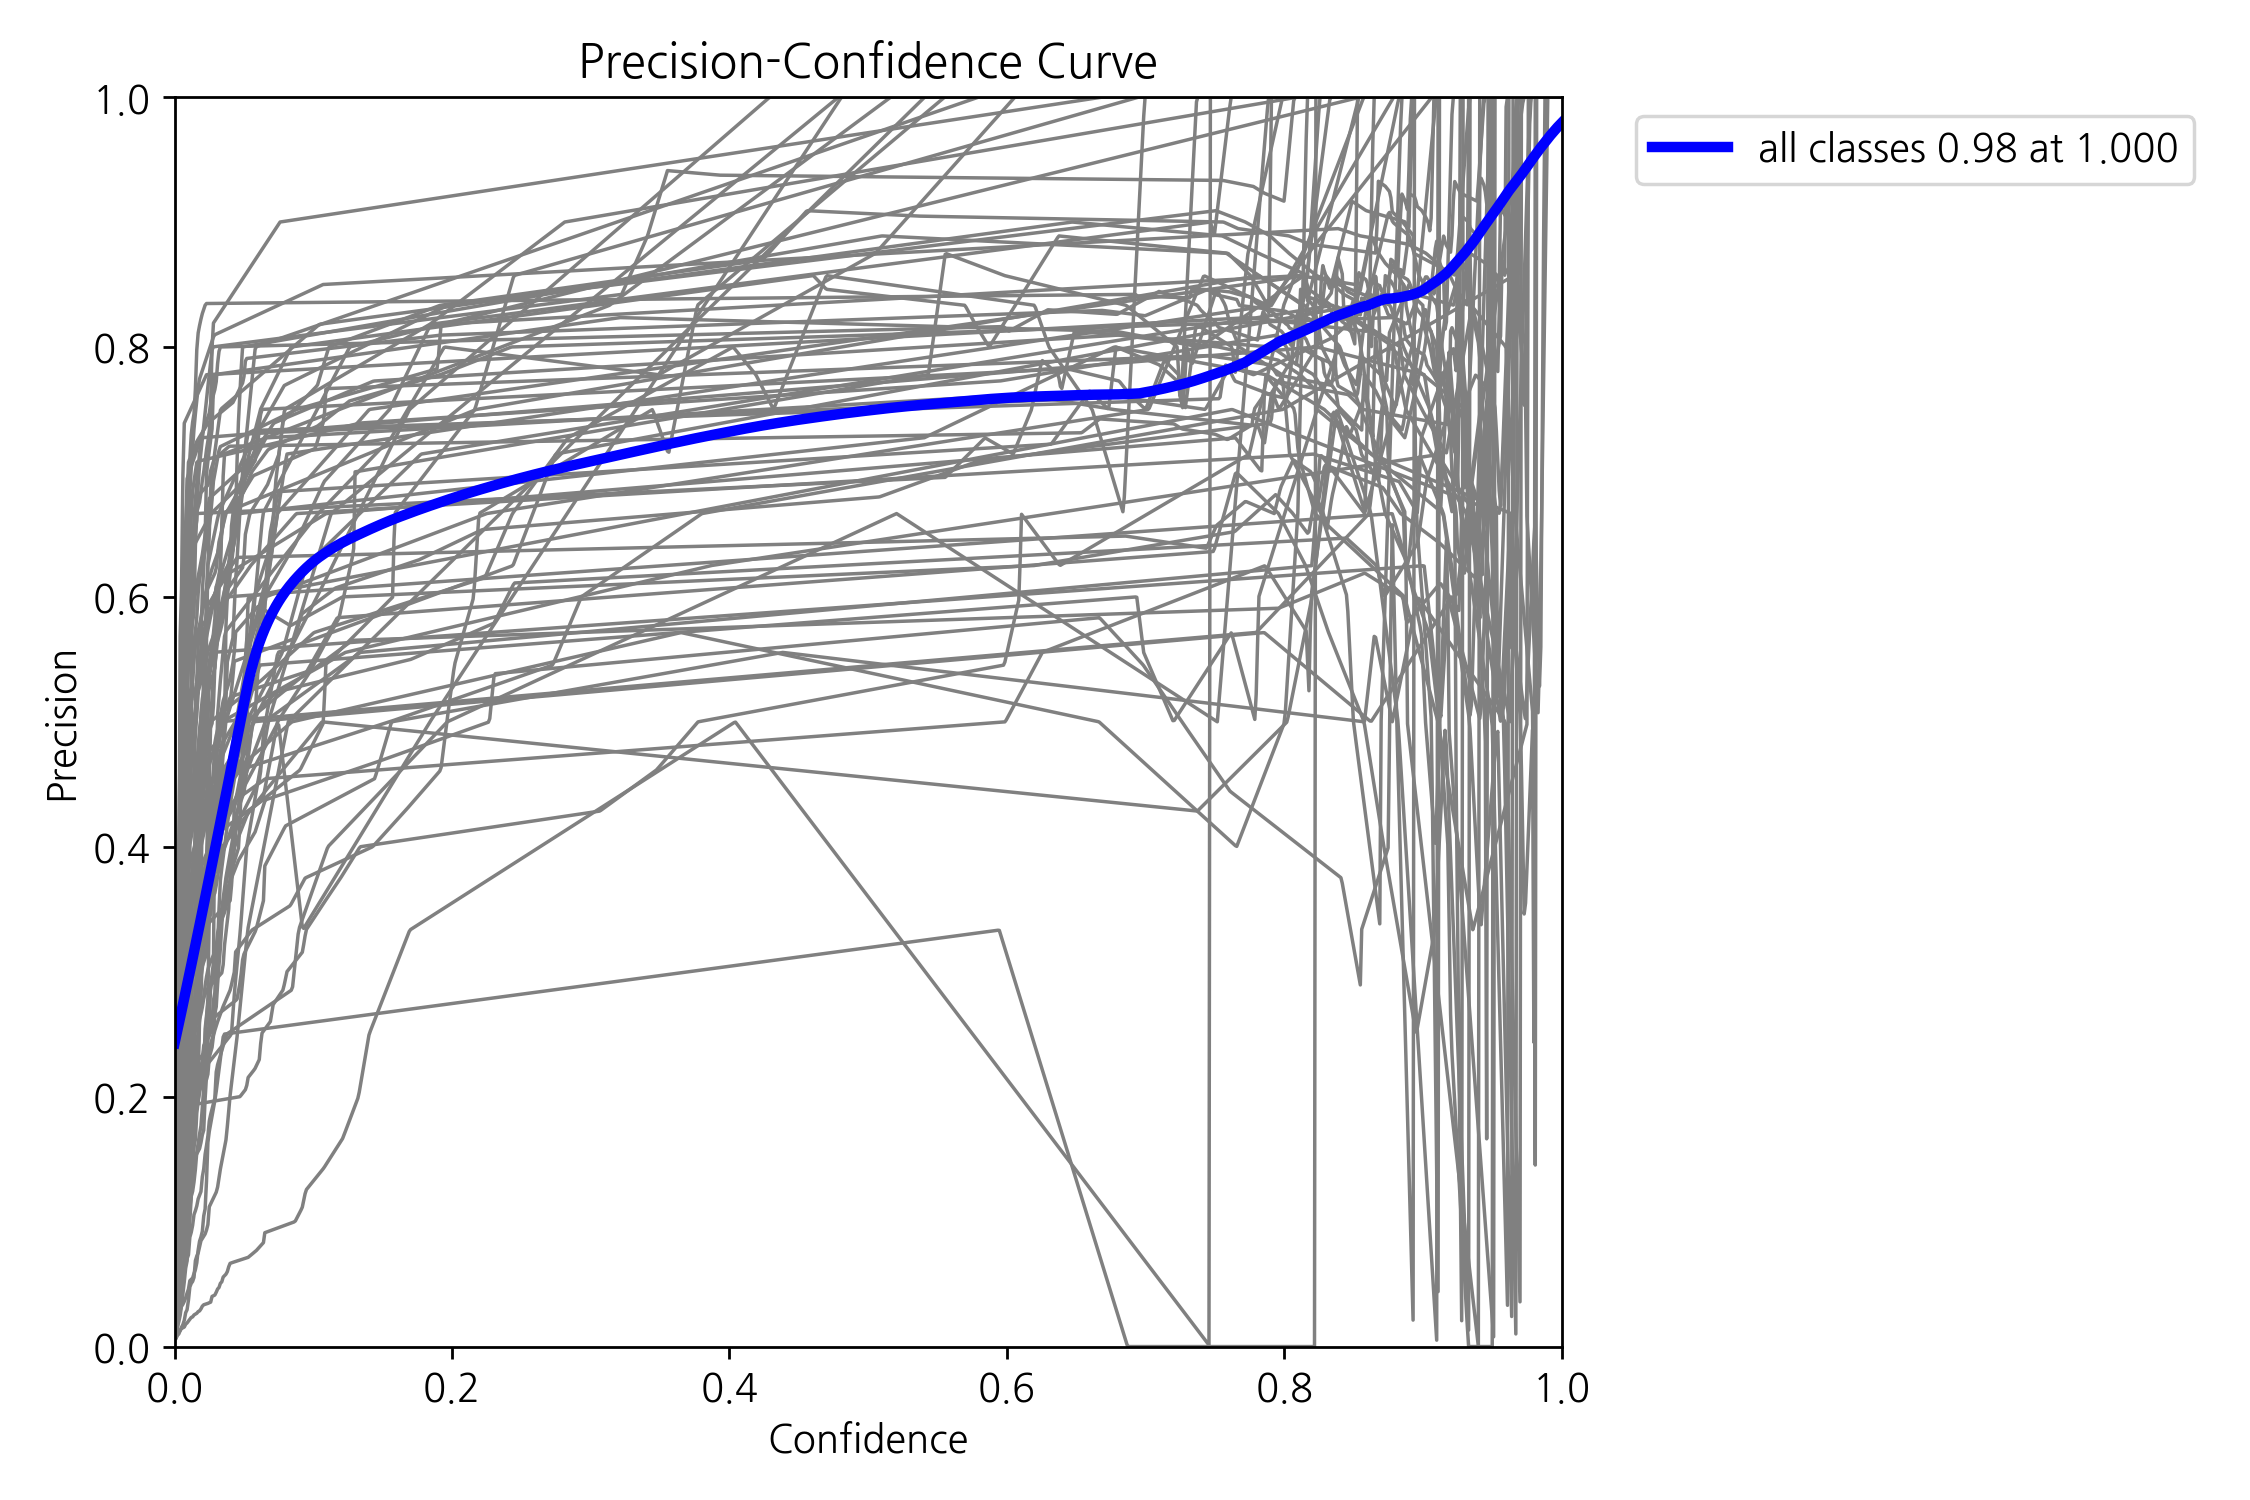

In [ ]:
Image(filename=f'/content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/checkpoints/runs/train/val4/P_curve.png', width=600)

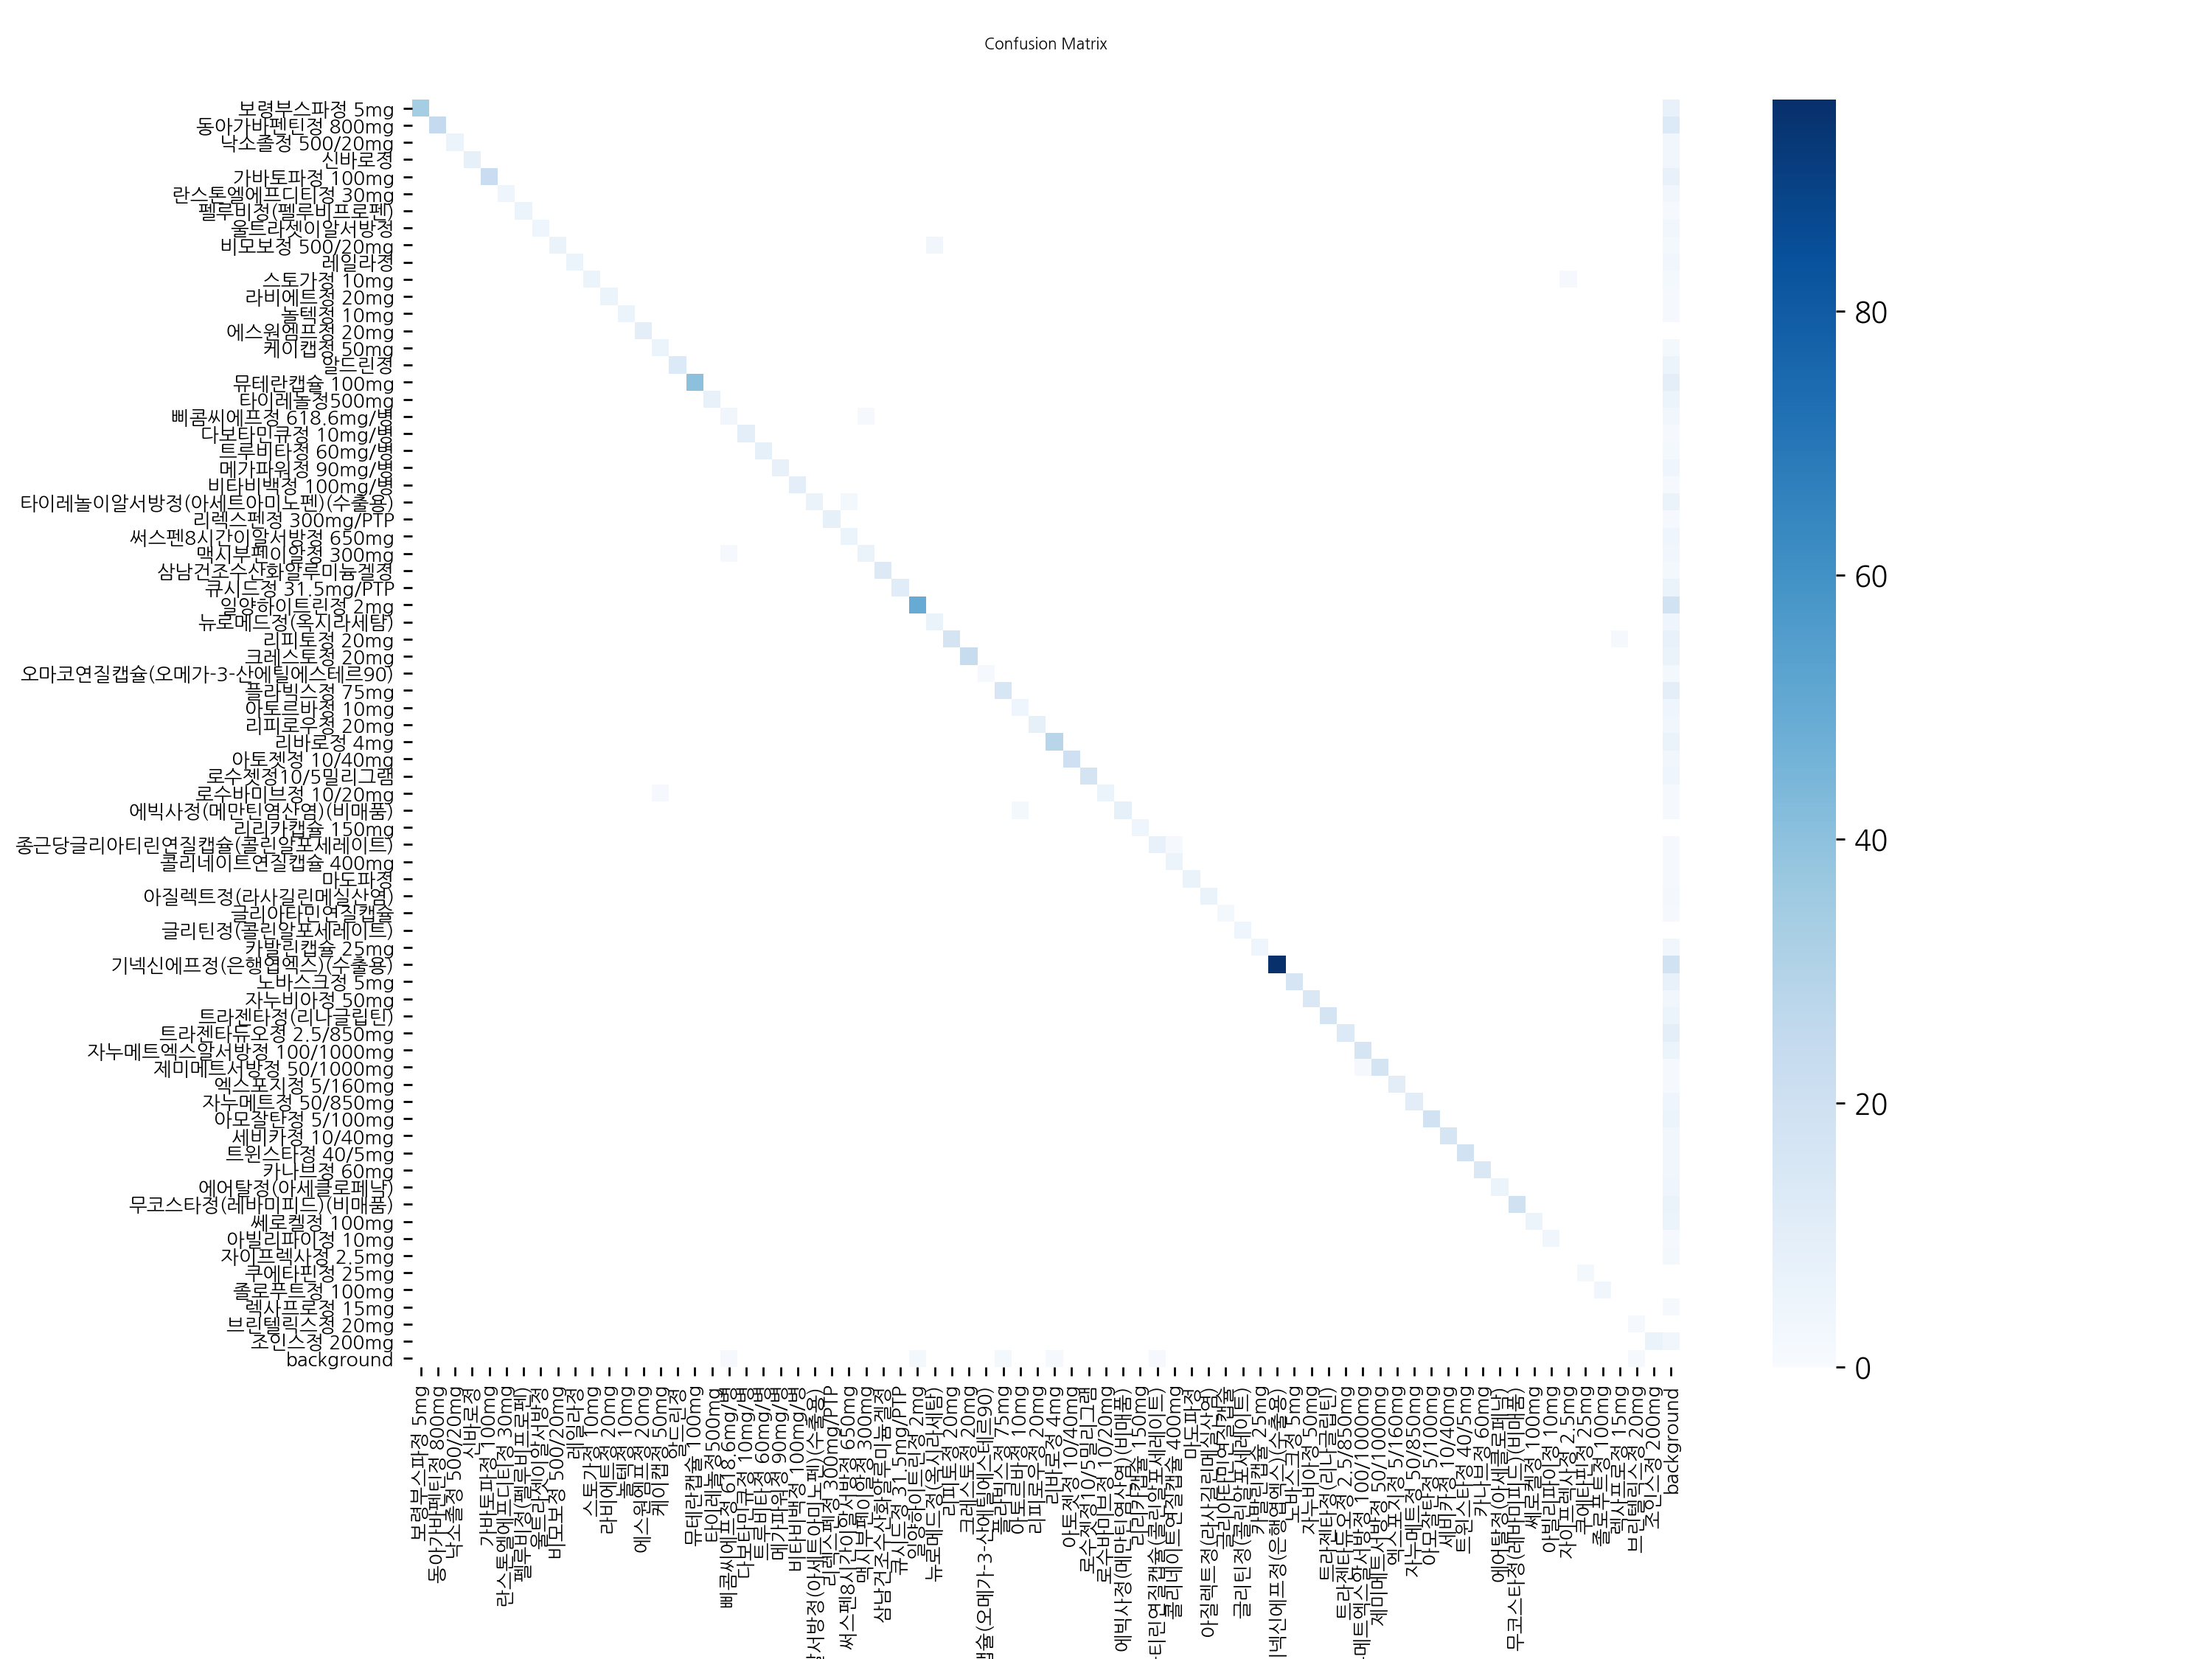

In [ ]:
Image(filename=f'/content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/checkpoints/runs/train/val4/confusion_matrix.png', width=600)

# 하이퍼파라미터 튜닝1
이전 베이스라인 모델이 안정적으로 loss, mAP가 수렴했다.

배치 사이즈는 올바르게 설정해서 안정적이게 학습한것 같으니 고정시키는것이 좋아보인다.

데이터 증강이나 에폭의 개수를 늘리는것도 좋아보인다.

epochs: 60

imgsz: 640

batch: 64

In [ ]:
run_train()

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=64, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/data/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/models/yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False,

100%|██████████| 22.2M/22.2M [00:00<00:00, 147MB/s] 

Overriding model.yaml nc=80 with nc=73

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           


  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  8                  -1  1    460288  ultralytics.nn.modules.block.C2f             [256, 256, 1, True]           
  9                  -1  1    164608  ultralytics.nn.modules.block.SPPF            [256, 256, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  1    148224  ultralytics.nn.modules.block.C2f             [384, 128, 1]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  1     37248  ultralytics.nn.modules.block.C2f             [192,

100%|██████████| 5.35M/5.35M [00:00<00:00, 101MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.7±0.2 ms, read: 5.3±1.1 MB/s, size: 1798.5 KB)


train: Scanning /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/data/train/labels.cache... 1186 images, 0 backgrounds, 1 corrupt: 100%|██████████| 1186/1186 [00:00<?, ?it/s]

train: /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/data/train/images/K-003544-004543-012247-016551_0_2_0_2_70_000_200.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     7.0293]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.7±0.1 ms, read: 5.4±2.3 MB/s, size: 1745.0 KB)


val: Scanning /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/data/val/labels.cache... 297 images, 0 backgrounds, 1 corrupt: 100%|██████████| 297/297 [00:00<?, ?it/s]

val: /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/data/val/images/K-003351-016262-018357_0_2_0_2_75_000_200.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     6.8878]


Plotting labels to /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/checkpoints/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00013, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/checkpoints/train
Starting training for 60 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/60      8.32G      1.249      4.943      1.205        383        640:  11%|█         | 2/19 [00:39<04:41, 16.57s/it]


100%|██████████| 755k/755k [00:00<00:00, 22.3MB/s]
       1/60      8.35G      1.106      4.871      1.143        202        640: 100%|██████████| 19/19 [06:35<00:00, 20.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.60it/s]

                   all        296        870          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/60      8.35G     0.5946      4.452     0.9347        198        640: 100%|██████████| 19/19 [00:51<00:00,  2.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.04s/it]

                   all        296        870     0.0109    0.00385    0.00709    0.00656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/60      8.34G     0.5311      3.919     0.9352        197        640: 100%|██████████| 19/19 [00:48<00:00,  2.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.19s/it]

                   all        296        870     0.0264       0.11     0.0453     0.0429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/60      8.35G     0.5168      3.292     0.9555        200        640: 100%|██████████| 19/19 [00:47<00:00,  2.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.60s/it]


                   all        296        870     0.0539      0.324      0.122      0.116

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/60      8.36G     0.4846      2.669     0.9517        176        640: 100%|██████████| 19/19 [00:48<00:00,  2.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.74s/it]


                   all        296        870      0.836      0.162      0.304      0.287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/60      8.36G     0.4458      2.099     0.9223        219        640: 100%|██████████| 19/19 [00:49<00:00,  2.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.79s/it]


                   all        296        870      0.713       0.41      0.479      0.455

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/60      8.36G     0.4343      1.753     0.9231        159        640: 100%|██████████| 19/19 [00:46<00:00,  2.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]


                   all        296        870      0.624      0.578      0.534       0.51

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/60      8.34G     0.4131      1.539     0.9072        202        640: 100%|██████████| 19/19 [00:45<00:00,  2.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.25s/it]


                   all        296        870      0.617      0.686      0.621      0.595

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/60      8.34G     0.3976      1.398     0.8997        184        640: 100%|██████████| 19/19 [00:49<00:00,  2.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.22s/it]


                   all        296        870      0.663      0.701      0.692      0.669

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/60      8.36G     0.3821      1.321     0.8896        187        640: 100%|██████████| 19/19 [00:49<00:00,  2.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]


                   all        296        870      0.624       0.83      0.739      0.713

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/60      8.37G     0.3744      1.237     0.8854        171        640: 100%|██████████| 19/19 [00:46<00:00,  2.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]

                   all        296        870      0.685      0.809      0.738      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/60      8.34G     0.3697       1.18     0.8821        173        640: 100%|██████████| 19/19 [00:46<00:00,  2.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.65s/it]


                   all        296        870      0.681      0.838      0.758      0.734

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/60      8.37G     0.3672      1.135     0.8812        184        640: 100%|██████████| 19/19 [00:46<00:00,  2.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.29s/it]


                   all        296        870      0.694      0.866      0.789      0.766

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/60      8.37G     0.3581      1.095     0.8734        189        640: 100%|██████████| 19/19 [00:46<00:00,  2.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]

                   all        296        870      0.646      0.896      0.808      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/60      8.36G     0.3511      1.067     0.8712        218        640: 100%|██████████| 19/19 [00:48<00:00,  2.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.32s/it]


                   all        296        870      0.649      0.916      0.822      0.792

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/60      8.38G     0.3397      1.026     0.8658        212        640: 100%|██████████| 19/19 [00:46<00:00,  2.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.62s/it]


                   all        296        870      0.687      0.921      0.832      0.808

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/60      8.37G     0.3415      1.008     0.8589        183        640: 100%|██████████| 19/19 [00:47<00:00,  2.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.77s/it]


                   all        296        870      0.668      0.926      0.818      0.794

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/60      8.34G     0.3442      1.009     0.8722        176        640: 100%|██████████| 19/19 [00:45<00:00,  2.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]


                   all        296        870      0.682      0.924      0.841      0.818

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/60      8.36G     0.3274     0.9699     0.8632        229        640: 100%|██████████| 19/19 [00:48<00:00,  2.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.30s/it]

                   all        296        870      0.694       0.93       0.85      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/60      8.34G     0.3318     0.9548     0.8694        152        640: 100%|██████████| 19/19 [00:47<00:00,  2.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.25s/it]


                   all        296        870      0.688      0.945      0.836      0.815

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/60      8.37G     0.3268     0.9354     0.8631        172        640: 100%|██████████| 19/19 [00:46<00:00,  2.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.77s/it]


                   all        296        870      0.736      0.927      0.842      0.822

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/60      8.36G     0.3267     0.9007     0.8621        207        640: 100%|██████████| 19/19 [00:44<00:00,  2.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.54s/it]


                   all        296        870      0.732      0.942      0.846       0.83

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/60      8.33G     0.3133     0.8856     0.8594        176        640: 100%|██████████| 19/19 [00:46<00:00,  2.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.29s/it]


                   all        296        870      0.741      0.946      0.841      0.822

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/60      8.34G     0.3139     0.8984     0.8568        159        640: 100%|██████████| 19/19 [00:49<00:00,  2.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.22s/it]

                   all        296        870      0.743      0.953      0.852      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/60      8.35G     0.3104     0.8978     0.8498        154        640: 100%|██████████| 19/19 [00:45<00:00,  2.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]

                   all        296        870      0.704      0.986      0.856      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/60      8.36G       0.31     0.8778     0.8556        184        640: 100%|██████████| 19/19 [00:47<00:00,  2.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.89s/it]


                   all        296        870      0.736      0.958      0.868      0.847

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/60      8.37G     0.3086     0.8764     0.8536        204        640: 100%|██████████| 19/19 [00:45<00:00,  2.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]


                   all        296        870      0.731      0.959      0.842      0.827

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/60      8.36G      0.312     0.8674     0.8528        195        640: 100%|██████████| 19/19 [00:45<00:00,  2.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.86s/it]


                   all        296        870      0.728      0.983      0.857      0.842

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/60      8.34G     0.3071     0.8672     0.8538        214        640: 100%|██████████| 19/19 [00:47<00:00,  2.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]


                   all        296        870      0.757      0.952      0.852      0.834

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/60      8.36G     0.3022     0.8541     0.8518        160        640: 100%|██████████| 19/19 [00:46<00:00,  2.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]


                   all        296        870      0.711       0.98      0.854      0.836

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/60      8.33G     0.2976     0.8415     0.8541        190        640: 100%|██████████| 19/19 [00:45<00:00,  2.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.59s/it]


                   all        296        870      0.724      0.976      0.852      0.837

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/60      8.36G     0.2941     0.8325      0.846        199        640: 100%|██████████| 19/19 [00:46<00:00,  2.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.25s/it]


                   all        296        870      0.743      0.968      0.852      0.834

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/60      8.36G     0.2943     0.8228     0.8467        199        640: 100%|██████████| 19/19 [00:48<00:00,  2.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]


                   all        296        870      0.735      0.964      0.847      0.833

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/60      8.33G     0.2924     0.8122     0.8482        181        640: 100%|██████████| 19/19 [00:47<00:00,  2.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.26s/it]


                   all        296        870      0.729      0.965      0.854      0.841

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/60      8.34G     0.2877     0.8087      0.847        165        640: 100%|██████████| 19/19 [00:46<00:00,  2.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.70s/it]


                   all        296        870      0.751      0.951      0.857      0.842

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/60      8.36G     0.2902     0.8042     0.8496        192        640: 100%|██████████| 19/19 [00:46<00:00,  2.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.55s/it]


                   all        296        870      0.741      0.977      0.856      0.844

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/60      8.33G     0.2851     0.8005     0.8464        166        640: 100%|██████████| 19/19 [00:45<00:00,  2.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]


                   all        296        870      0.725      0.988      0.848      0.835

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/60      8.35G     0.2938     0.7989      0.851        170        640: 100%|██████████| 19/19 [00:48<00:00,  2.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.15s/it]

                   all        296        870      0.733      0.979      0.844      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/60      8.34G      0.287     0.8018     0.8461        188        640: 100%|██████████| 19/19 [00:46<00:00,  2.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]

                   all        296        870       0.73      0.979      0.848      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/60      8.34G     0.2785     0.7727     0.8429        190        640: 100%|██████████| 19/19 [00:44<00:00,  2.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.59s/it]


                   all        296        870      0.738      0.969      0.846      0.835

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/60      8.37G     0.2833     0.7613     0.8462        211        640: 100%|██████████| 19/19 [00:46<00:00,  2.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]


                   all        296        870      0.737       0.97      0.856      0.842

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/60      8.37G      0.279     0.7668     0.8437        189        640: 100%|██████████| 19/19 [00:47<00:00,  2.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]


                   all        296        870      0.748      0.971      0.854      0.844

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/60      8.37G     0.2835     0.7746     0.8437        201        640: 100%|██████████| 19/19 [00:47<00:00,  2.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.27s/it]

                   all        296        870       0.72      0.986       0.85      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/60      8.37G     0.2756     0.7583      0.841        184        640: 100%|██████████| 19/19 [00:46<00:00,  2.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.64s/it]

                   all        296        870      0.748      0.966      0.849      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/60      8.37G     0.2785     0.7469     0.8452        165        640: 100%|██████████| 19/19 [00:47<00:00,  2.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.82s/it]


                   all        296        870      0.744      0.967      0.846      0.837

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/60      8.34G     0.2722     0.7469     0.8424        197        640: 100%|██████████| 19/19 [00:45<00:00,  2.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.23s/it]


                   all        296        870       0.74      0.969      0.847      0.836

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/60      8.36G      0.273     0.7467     0.8399        209        640: 100%|██████████| 19/19 [00:49<00:00,  2.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.31s/it]


                   all        296        870      0.736       0.98      0.854      0.842

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/60      8.37G     0.2682     0.7444     0.8439        202        640: 100%|██████████| 19/19 [00:44<00:00,  2.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.57s/it]


                   all        296        870      0.734      0.974      0.854      0.844

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/60      8.34G     0.2746     0.7484     0.8451        199        640: 100%|██████████| 19/19 [00:46<00:00,  2.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.81s/it]

                   all        296        870      0.732      0.977      0.853      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/60      8.34G     0.2732     0.7346     0.8452        195        640: 100%|██████████| 19/19 [00:44<00:00,  2.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.29s/it]


                   all        296        870      0.736      0.971      0.854      0.843
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/60      8.19G     0.2386     0.8446     0.8181         97        640: 100%|██████████| 19/19 [00:57<00:00,  3.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]

                   all        296        870      0.737      0.965      0.845      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/60      8.19G     0.2187      0.788     0.8173        105        640: 100%|██████████| 19/19 [00:44<00:00,  2.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.29s/it]


                   all        296        870       0.74      0.963      0.847      0.832

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/60      8.19G     0.2188      0.779     0.8115         94        640: 100%|██████████| 19/19 [00:44<00:00,  2.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.73s/it]


                   all        296        870      0.743      0.971      0.857      0.845

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/60      8.19G     0.2142     0.7623     0.8121         98        640: 100%|██████████| 19/19 [00:44<00:00,  2.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]


                   all        296        870      0.737      0.977      0.853       0.84

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/60      8.19G     0.2131     0.7659     0.8106        104        640: 100%|██████████| 19/19 [00:44<00:00,  2.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.28s/it]


                   all        296        870      0.737      0.983      0.855      0.841

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/60      8.19G     0.2085     0.7529     0.8105         99        640: 100%|██████████| 19/19 [00:45<00:00,  2.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.80s/it]


                   all        296        870      0.739       0.98      0.856      0.843

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/60      8.19G     0.2079     0.7475     0.8067        112        640: 100%|██████████| 19/19 [00:46<00:00,  2.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.57s/it]


                   all        296        870      0.735      0.978      0.856      0.844

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/60      8.19G     0.2057     0.7429     0.8063        101        640: 100%|██████████| 19/19 [00:44<00:00,  2.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]


                   all        296        870      0.742      0.976      0.858      0.847

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/60      8.19G     0.2069     0.7451     0.8107        100        640: 100%|██████████| 19/19 [00:46<00:00,  2.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.22s/it]


                   all        296        870      0.741       0.98      0.856      0.846

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/60      8.19G     0.2071     0.7431     0.8087        101        640: 100%|██████████| 19/19 [00:43<00:00,  2.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.66s/it]


                   all        296        870      0.742      0.977      0.855      0.844

60 epochs completed in 0.997 hours.
Optimizer stripped from /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/checkpoints/train/weights/last.pt, 6.4MB
Optimizer stripped from /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/checkpoints/train/weights/best.pt, 6.4MB

Validating /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/checkpoints/train/weights/best.pt...
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,091,487 parameters, 0 gradients, 8.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:11<00:00,  3.76s/it]


                   all        296        870      0.746      0.945      0.867      0.846
            보령부스파정 5mg         34         34      0.801          1      0.869      0.855
         동아가바펜틴정 800mg         24         24      0.643          1      0.685      0.675
         낙소졸정 500/20mg          5          5      0.673          1      0.938        0.9
                  신바로정          8          8      0.711          1      0.741      0.741
           가바토파정 100mg         22         22      0.754      0.978      0.928      0.896
        란스톤엘에프디티정 30mg          4          4      0.527          1      0.663      0.614
          펠루비정(펠루비프로펜)          5          5      0.771          1      0.962      0.962
             울트라셋이알서방정          4          4      0.539          1      0.725      0.709
         비모보정 500/20mg          6          6      0.703          1      0.924      0.924
                  레일라정          5          5      0.589          1      0.655      0.655
             스토가정 10m

In [ ]:
run_val(cfg)

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,091,487 parameters, 0 gradients, 8.5 GFLOPs
val: Fast image access ✅ (ping: 0.9±0.5 ms, read: 307.3±180.8 MB/s, size: 1747.7 KB)


val: Scanning /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/data/val/labels.cache... 297 images, 0 backgrounds, 1 corrupt: 100%|██████████| 297/297 [00:00<?, ?it/s]

val: /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/data/val/images/K-003351-016262-018357_0_2_0_2_75_000_200.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     6.8878]



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:13<00:00,  2.76s/it]


                   all        296        870      0.745      0.945      0.867      0.848
            보령부스파정 5mg         34         34      0.801          1      0.864       0.85
         동아가바펜틴정 800mg         24         24      0.643          1      0.675      0.666
         낙소졸정 500/20mg          5          5      0.664          1      0.938        0.9
                  신바로정          8          8      0.711          1      0.741      0.741
           가바토파정 100mg         22         22      0.755       0.98      0.928        0.9
        란스톤엘에프디티정 30mg          4          4      0.527          1      0.663      0.614
          펠루비정(펠루비프로펜)          5          5      0.771          1      0.962      0.962
             울트라셋이알서방정          4          4      0.539          1      0.725      0.709
         비모보정 500/20mg          6          6      0.702          1      0.924      0.924
                  레일라정          5          5      0.589          1      0.655      0.655
             스토가정 10m

# 하이퍼파라미터 튜닝2
- epochs=30
- patience=5
- cache=ram
- seed=42
- multi_scale=True
- close_mosaic=10

patience로 지점에 다다르면 종룔되게해 속도 빠르게한다.

cache=ram으로 학습 속도 향상

seed=42 학습 재현성

multi_scale로 일반화 상승

close_mosaic으로 안정적 학습 마무리

In [7]:
run_train(cfg)

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=64, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/data/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/models/yolov8n.pt, momentum=0.937, mosaic=1.0, multi

100%|██████████| 22.2M/22.2M [00:00<00:00, 163MB/s] 

Overriding model.yaml nc=80 with nc=73

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

 17            [-1, 12]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 18                  -1  1    123648  ultralytics.nn.modules.block.C2f             [192, 128, 1]                 
 19                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
 20             [-1, 9]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 21                  -1  1    493056  ultralytics.nn.modules.block.C2f             [384, 256, 1]                 
 22        [15, 18, 21]  1    837205  ultralytics.nn.modules.head.Detect           [73, [64, 128, 256]]          
Model summary: 129 layers, 3,096,741 parameters, 3,096,725 gradients, 8.6 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 60.8MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 2.5±4.3 ms, read: 6.8±2.3 MB/s, size: 1698.1 KB)


train: Scanning /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/data/train/labels.cache... 1186 images, 0 backgrounds, 1 corrupt: 100%|██████████| 1186/1186 [00:00<?, ?it/s]

train: /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/data/train/images/K-003544-004543-012247-016551_0_2_0_2_70_000_200.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     7.0293]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.6±0.2 ms, read: 7.0±3.3 MB/s, size: 1780.5 KB)


val: Scanning /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/data/val/labels.cache... 297 images, 0 backgrounds, 1 corrupt: 100%|██████████| 297/297 [00:00<?, ?it/s]

val: /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/data/val/images/K-003351-016262-018357_0_2_0_2_75_000_200.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     6.8878]


Plotting labels to /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/checkpoints/train10/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00013, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/checkpoints/train10
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.41G      0.961       5.22      1.035        383        320:  11%|█         | 2/19 [00:04<00:31,  1.85s/it]

       1/30      3.04G      1.004      5.182      1.052        341        384:  16%|█▌        | 3/19 [00:04<00:18,  1.17s/it]
100%|██████████| 755k/755k [00:00<00:00, 14.8MB/s]
       1/30      24.3G      1.042      4.939      1.135        167        480: 100%|██████████| 19/19 [00:11<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:37<00:00, 12.58s/it]

                   all        296        870          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      18.2G     0.6267      4.553     0.9529        205        704: 100%|██████████| 19/19 [00:05<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.58it/s]

                   all        296        870    0.00852    0.00328    0.00578    0.00541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      22.9G     0.5638      4.112     0.9453        189        960: 100%|██████████| 19/19 [00:04<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]


                   all        296        870      0.027     0.0619     0.0375     0.0351

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      20.1G     0.5297      3.567     0.9513        156        864: 100%|██████████| 19/19 [00:05<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.43it/s]


                   all        296        870     0.0431      0.324      0.129      0.122

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30        22G     0.5174      3.093     0.9461        196        448: 100%|██████████| 19/19 [00:04<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.49it/s]

                   all        296        870     0.0549      0.567      0.227      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      20.9G     0.4934      2.607     0.9345        177        448: 100%|██████████| 19/19 [00:04<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.45it/s]


                   all        296        870      0.817       0.21       0.35       0.33

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      18.6G     0.4707      2.305      0.935        233        416: 100%|██████████| 19/19 [00:05<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.06it/s]


                   all        296        870      0.726      0.452      0.462      0.447

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      18.6G      0.454      2.024     0.9246        170        480: 100%|██████████| 19/19 [00:04<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]


                   all        296        870      0.643      0.579      0.544      0.519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      18.6G     0.4445      1.944     0.9085        162        864: 100%|██████████| 19/19 [00:04<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.04it/s]

                   all        296        870      0.573      0.672       0.59      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      18.6G      0.405       1.63     0.9012        185        768: 100%|██████████| 19/19 [00:05<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.47it/s]


                   all        296        870      0.641      0.726      0.663      0.644

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      18.6G     0.4283      1.731     0.8889        167        640: 100%|██████████| 19/19 [00:04<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all        296        870       0.62       0.76      0.675      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      18.6G     0.3966      1.456     0.8929        194        672: 100%|██████████| 19/19 [00:04<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]

                   all        296        870      0.626      0.789      0.702      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      18.6G     0.4027      1.457     0.8893        166        480: 100%|██████████| 19/19 [00:04<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.03it/s]


                   all        296        870      0.648      0.797      0.726      0.703

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      18.6G     0.3921      1.416     0.8814        209        704: 100%|██████████| 19/19 [00:04<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]


                   all        296        870      0.617      0.832      0.735      0.714

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      18.6G     0.3881      1.378      0.875        194        352: 100%|██████████| 19/19 [00:04<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]


                   all        296        870      0.695      0.823      0.758      0.741

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      18.7G     0.3881      1.351      0.883        188        896: 100%|██████████| 19/19 [00:04<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]


                   all        296        870      0.702      0.819      0.781      0.759

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      18.7G     0.3725      1.294     0.8858        185        960: 100%|██████████| 19/19 [00:05<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.46it/s]

                   all        296        870      0.684       0.84      0.804      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      18.7G     0.3687       1.26     0.8753        209        672: 100%|██████████| 19/19 [00:04<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]

                   all        296        870      0.725      0.838      0.794      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      18.7G     0.3728      1.259     0.8831        175        576: 100%|██████████| 19/19 [00:05<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]


                   all        296        870      0.668      0.894      0.801      0.786

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      18.7G      0.351      1.209     0.8661        173        448: 100%|██████████| 19/19 [00:04<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.19it/s]

                   all        296        870       0.72      0.884      0.813      0.799


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      18.7G     0.2871      1.236     0.8353         94        448: 100%|██████████| 19/19 [00:10<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]


                   all        296        870      0.707      0.855      0.787       0.77

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      18.7G     0.2662      1.074     0.8125        100        480: 100%|██████████| 19/19 [00:04<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all        296        870      0.701      0.916      0.795      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      18.7G     0.2655      1.055     0.8132        104        704: 100%|██████████| 19/19 [00:04<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.04it/s]

                   all        296        870      0.735      0.893      0.803      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      18.7G     0.2643      1.102     0.8172         99        928: 100%|██████████| 19/19 [00:04<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]

                   all        296        870      0.728      0.903      0.808      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      18.7G     0.2598      1.131     0.8275        100        736: 100%|██████████| 19/19 [00:05<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.23it/s]


                   all        296        870      0.724      0.913      0.807      0.791
EarlyStopping: Training stopped early as no improvement observed in last 5 epochs. Best results observed at epoch 20, best model saved as best.pt.
To update EarlyStopping(patience=5) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

25 epochs completed in 0.061 hours.
Optimizer stripped from /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/checkpoints/train10/weights/last.pt, 6.4MB
Optimizer stripped from /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/checkpoints/train10/weights/best.pt, 6.4MB

Validating /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/checkpoints/train10/weights/best.pt...
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 3,091,487 parameters, 0 gradients,

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.40it/s]


                   all        296        870       0.72      0.884      0.813      0.799
            보령부스파정 5mg         34         34       0.79          1      0.887      0.886
         동아가바펜틴정 800mg         24         24      0.643          1      0.692      0.687
         낙소졸정 500/20mg          5          5      0.575          1      0.862      0.829
                  신바로정          8          8      0.714          1      0.741      0.698
           가바토파정 100mg         22         22      0.744          1      0.918      0.918
        란스톤엘에프디티정 30mg          4          4      0.425          1      0.569      0.544
          펠루비정(펠루비프로펜)          5          5      0.762          1      0.995      0.995
             울트라셋이알서방정          4          4      0.544          1      0.569      0.546
         비모보정 500/20mg          6          6      0.691          1      0.843      0.843
                  레일라정          5          5      0.571          1       0.92       0.92
             스토가정 10m

In [ ]:
run_val(cfg)

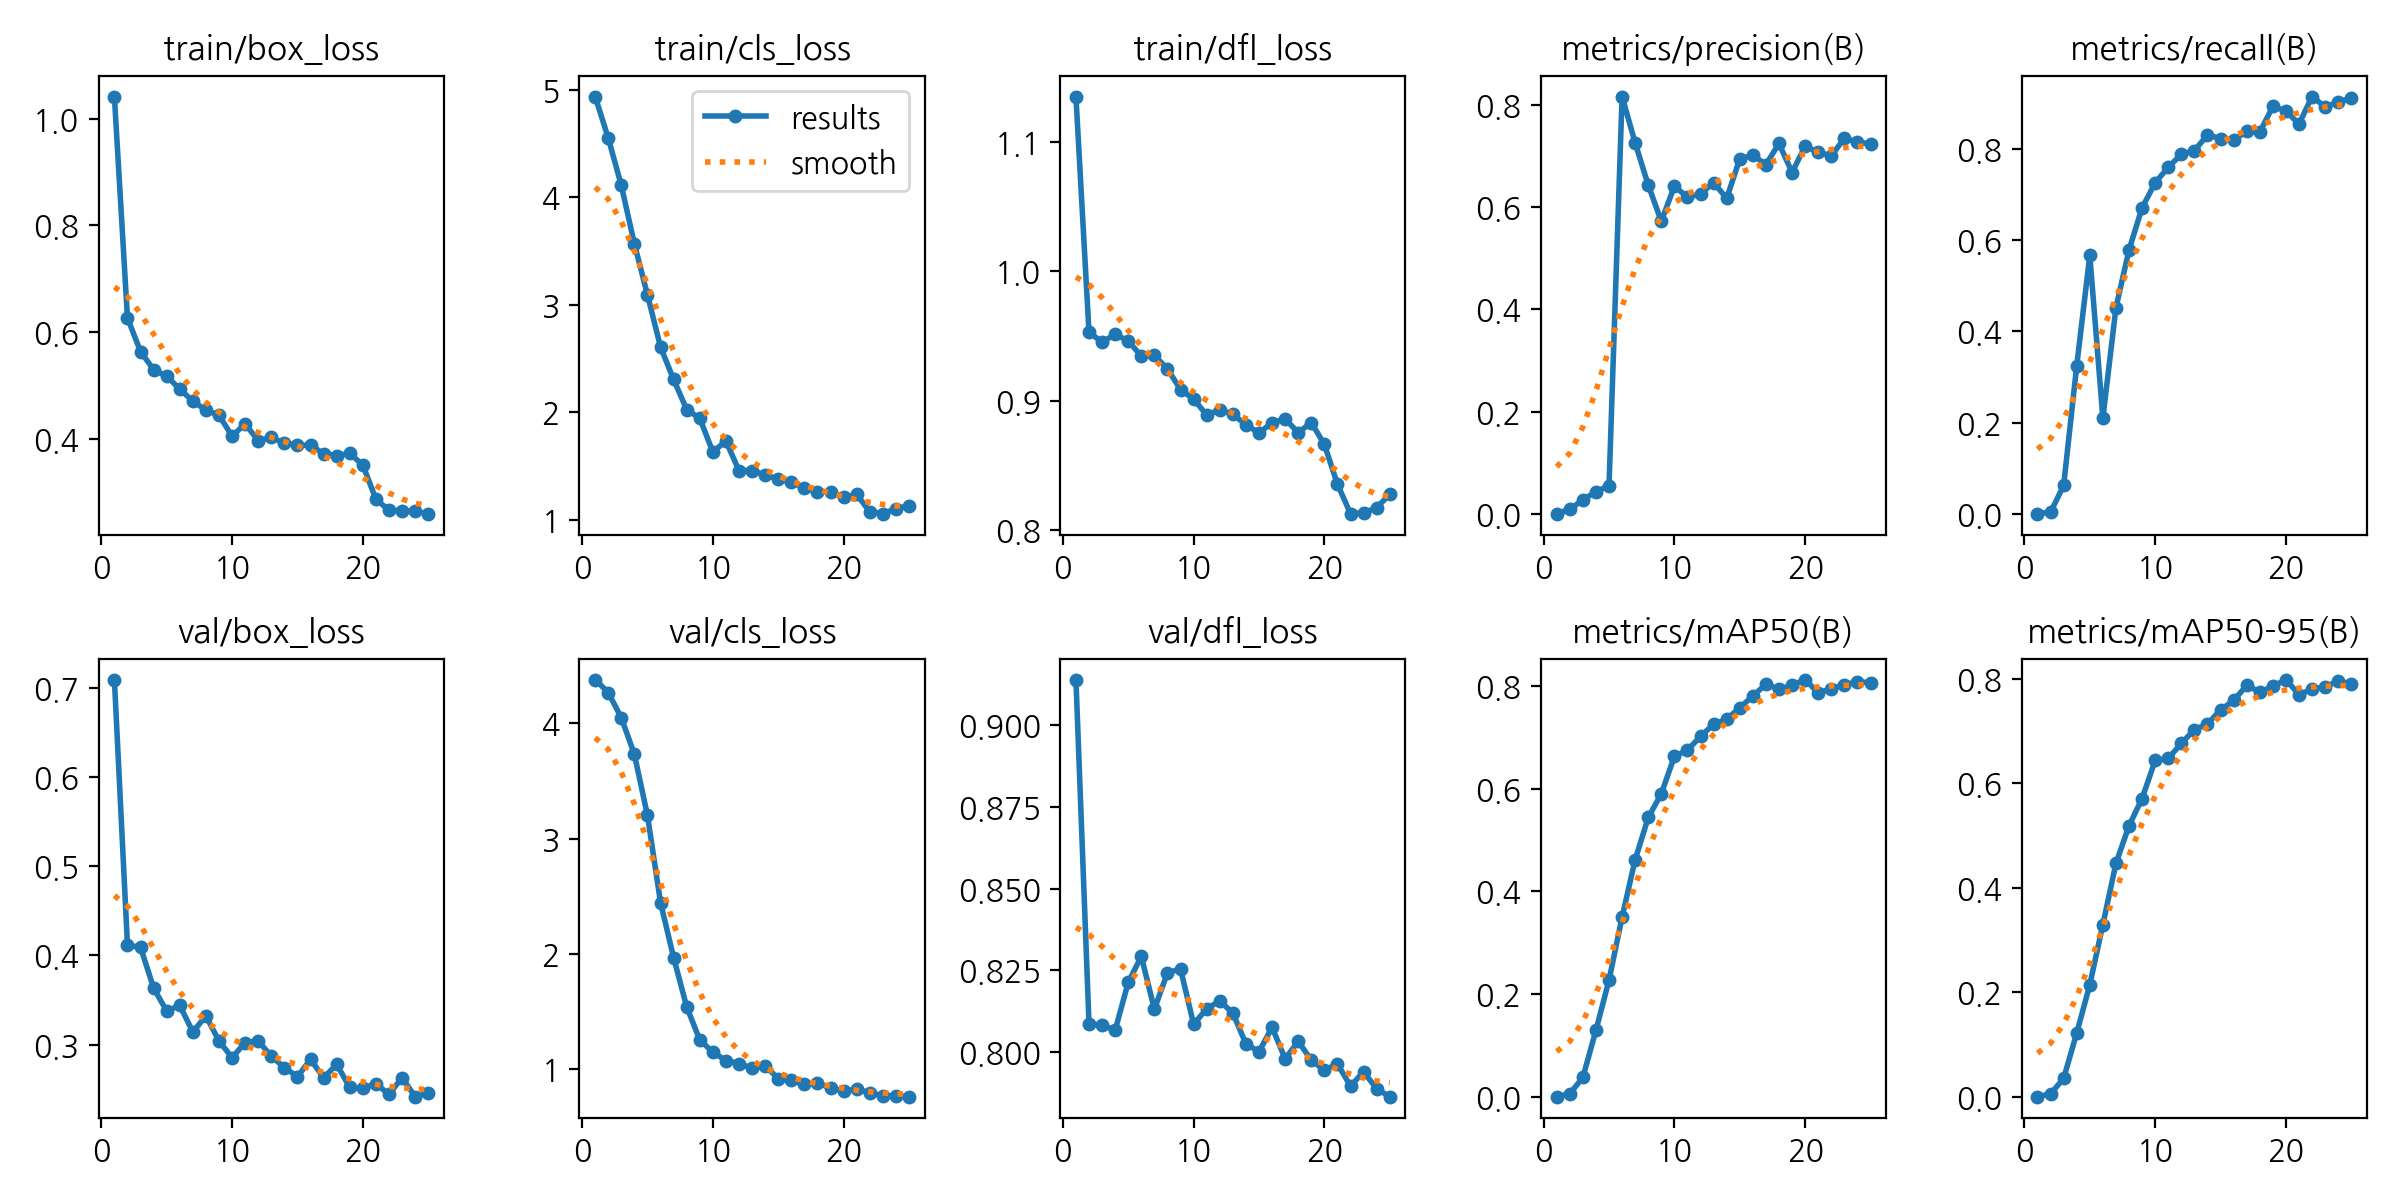

In [7]:
Image(filename=f'/content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/checkpoints/train10/results.png', width=600)

# 하이퍼 파라미터 튜닝3
- epochs=60
- patience=5
- cache=ram
- seed=42
- multi_scale=True
- close_mosaic=10
- lr0=1e-2 -> 1e-4
- lrf=0.01

더 작은 학습률로 fine-tune이 가능하게 한다.

In [ ]:
run_train(cfg)

# 하이퍼파라미터 튜닝4
batch_size 64 -> 32

In [8]:
print(cfg.train)

{'epochs': 60, 'imgsz': 640, 'batch': 16, 'cache': 'ram', 'seed': 42, 'multi_scale': True, 'close_mosaic': 10, 'lr0': 1e-05, 'lrf': 0.01, 'hsv_v': 0.5, 'hsv_s': 0.5, 'hsv_h': 0.5}


In [9]:
grid_search = {
    'lr0': [1e-4, 1e-5, 1e-6],          # initial learning rates
    'lrf': [0.1, 0.01],                 # final learning rate factors
    'batch_size': [8, 16, 32],                  # batch sizes
}

for lr0, lrf, batch_size in itertools.product(grid_search['lr0'], grid_search['lrf'], grid_search['batch_size']):
    cfg = OmegaConf.load(cfg_path)
    cfg.train.lr0 = lr0
    cfg.train.lrf = lrf
    cfg.train.batch = batch_size
    print(f"lr0: {lr0}, lrf: {lrf}, batch_size: {batch_size}")

    run_name = f"lr0_{lr0}_lrf_{lrf}_batch_{batch_size}"
    project_dir = os.path.join(cfg.colab.project, 'grid_search', run_name)
    os.makedirs(project_dir, exist_ok=True)

    # Initialize and train model
    model = YOLO(cfg.colab.yolov8)
    model.train(
        data=cfg.colab.data_yaml,
        epochs=cfg.train.epochs,
        imgsz=cfg.train.imgsz,
        batch=batch_size,
        lr0=lr0,
        lrf=lrf,
        close_mosaic=cfg.train.close_mosaic,
        seed=cfg.train.seed,
        project=project_dir
    )

lr0: 1e-05, lrf: 0.1, batch_size: 8
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/data/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=1e-05, lrf=0.1, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/models/yolov8m.pt, momentum=

100%|██████████| 22.2M/22.2M [00:00<00:00, 43.1MB/s]

Overriding model.yaml nc=80 with nc=73

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytic

 21                  -1  2   4207104  ultralytics.nn.modules.block.C2f             [960, 576, 2]                 
 22        [15, 18, 21]  1   3817963  ultralytics.nn.modules.head.Detect           [73, [192, 384, 576]]         
Model summary: 169 layers, 25,898,587 parameters, 25,898,571 gradients, 79.3 GFLOPs

Transferred 469/475 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 385MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 2.3±3.8 ms, read: 1.9±0.6 MB/s, size: 1698.1 KB)


train: Scanning /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/data/train/labels.cache... 1186 images, 0 backgrounds, 1 corrupt: 100%|██████████| 1186/1186 [00:00<?, ?it/s]

train: /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/data/train/images/K-003544-004543-012247-016551_0_2_0_2_70_000_200.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     7.0293]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.6±0.2 ms, read: 2.1±0.2 MB/s, size: 1780.5 KB)


val: Scanning /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/data/val/labels.cache... 297 images, 0 backgrounds, 1 corrupt: 100%|██████████| 297/297 [00:00<?, ?it/s]

val: /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/data/val/images/K-003351-016262-018357_0_2_0_2_75_000_200.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     6.8878]


Plotting labels to /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/checkpoints/grid_search/lr0_1e-05_lrf_0.1_batch_8/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=1e-05' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00013, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/checkpoints/grid_search/lr0_1e-05_lrf_0.1_batch_8/train3
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100       3.3G      1.435      5.535      1.435         49        640:   4%|▍         | 6/149 [00:02<00:33,  4.32it/s]

      1/100      3.36G      1.487      5.511      1.503         27        640:   5%|▌         | 8/149 [00:02<00:33,  4.25it/s]
100%|██████████| 755k/755k [00:00<00:00, 94.5MB/s]
      1/100      3.42G     0.7795      3.329      1.098          5        640: 100%|██████████| 149/149 [03:24<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:05<00:00,  3.50it/s]


                   all        296        870      0.603      0.534      0.517      0.489

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.87G      0.438      1.404     0.8985          5        640: 100%|██████████| 149/149 [00:22<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.81it/s]

                   all        296        870      0.656      0.847      0.756      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.93G     0.3998      1.098     0.8825          2        640: 100%|██████████| 149/149 [00:23<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.31it/s]


                   all        296        870       0.67      0.882      0.789      0.755

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.98G      0.385     0.9399     0.8754          5        640: 100%|██████████| 149/149 [00:23<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.44it/s]


                   all        296        870        0.7      0.901      0.844      0.809

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.01G     0.3736     0.8654      0.869          9        640: 100%|██████████| 149/149 [00:23<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.25it/s]

                   all        296        870      0.702      0.939      0.832      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      4.06G     0.3644     0.8159     0.8697          4        640: 100%|██████████| 149/149 [00:23<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.02it/s]


                   all        296        870      0.723       0.96      0.842      0.823

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      4.07G     0.3568     0.7378     0.8659          5        640: 100%|██████████| 149/149 [00:23<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.21it/s]


                   all        296        870      0.707      0.971      0.848      0.827

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      4.13G     0.3461     0.7173     0.8642          2        640: 100%|██████████| 149/149 [00:23<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.88it/s]

                   all        296        870      0.722      0.943      0.826      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      4.38G     0.3359       0.67     0.8604          6        640: 100%|██████████| 149/149 [00:23<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.18it/s]


                   all        296        870      0.739      0.954       0.85      0.832

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      4.45G     0.3312     0.6648     0.8506          3        640: 100%|██████████| 149/149 [00:23<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.44it/s]


                   all        296        870      0.722      0.967      0.858      0.834

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      4.51G     0.3269     0.6367     0.8545          4        640: 100%|██████████| 149/149 [00:25<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.84it/s]


                   all        296        870      0.732      0.964      0.841      0.824

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      4.51G     0.3188     0.6059     0.8494          2        640: 100%|██████████| 149/149 [00:23<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.03it/s]


                   all        296        870      0.721      0.983      0.842      0.826

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      4.51G     0.3124      0.614     0.8496          4        640: 100%|██████████| 149/149 [00:23<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.06it/s]


                   all        296        870      0.729       0.97      0.856      0.832

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      4.51G     0.3113     0.6093     0.8513          4        640: 100%|██████████| 149/149 [00:23<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.19it/s]


                   all        296        870      0.726       0.98      0.852      0.834

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      4.51G     0.3017     0.5842     0.8464         10        640: 100%|██████████| 149/149 [00:23<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.92it/s]

                   all        296        870      0.728      0.988      0.852      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      4.51G     0.2947     0.5741     0.8438          4        640: 100%|██████████| 149/149 [00:23<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.71it/s]

                   all        296        870      0.724       0.98      0.853      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      4.51G     0.2959     0.5728     0.8472          6        640: 100%|██████████| 149/149 [00:24<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.02it/s]


                   all        296        870      0.732      0.984      0.857       0.84

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      4.51G     0.2992     0.5874      0.845          4        640: 100%|██████████| 149/149 [00:23<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.24it/s]

                   all        296        870      0.716      0.975      0.861      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      4.51G     0.2923     0.5777     0.8491          4        640: 100%|██████████| 149/149 [00:23<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.96it/s]

                   all        296        870      0.703      0.989      0.862      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      4.51G     0.2908     0.5611     0.8461          5        640: 100%|██████████| 149/149 [00:23<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.97it/s]

                   all        296        870      0.734      0.969       0.86      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      4.51G     0.2823     0.5452     0.8357          3        640: 100%|██████████| 149/149 [00:23<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.78it/s]


                   all        296        870      0.721      0.987      0.844      0.832

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      4.51G     0.2859     0.5567     0.8374          2        640: 100%|██████████| 149/149 [00:23<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.16it/s]

                   all        296        870      0.725      0.988       0.86      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      4.51G     0.2855     0.5476     0.8449          6        640: 100%|██████████| 149/149 [00:23<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.15it/s]


                   all        296        870      0.746      0.976      0.859       0.85

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      4.51G     0.2731     0.5464     0.8398          3        640: 100%|██████████| 149/149 [00:23<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.34it/s]


                   all        296        870      0.736      0.986      0.857      0.843

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      4.51G     0.2784     0.5581     0.8353          1        640: 100%|██████████| 149/149 [00:23<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.05it/s]


                   all        296        870      0.733      0.982      0.855      0.843

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      4.51G     0.2718      0.533     0.8375          6        640: 100%|██████████| 149/149 [00:23<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.12it/s]


                   all        296        870      0.735      0.982      0.856      0.848

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      4.51G     0.2661     0.5231     0.8375          5        640: 100%|██████████| 149/149 [00:23<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.76it/s]

                   all        296        870      0.723      0.985      0.855      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      4.51G     0.2671     0.5151     0.8313          6        640: 100%|██████████| 149/149 [00:23<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.98it/s]


                   all        296        870      0.717      0.975      0.854      0.842

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      4.51G      0.266     0.5134     0.8396          5        640: 100%|██████████| 149/149 [00:23<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.08it/s]

                   all        296        870      0.746      0.968      0.857      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      4.51G     0.2674      0.506     0.8389          3        640: 100%|██████████| 149/149 [00:23<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.17it/s]


                   all        296        870      0.748      0.978      0.855      0.846

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      4.51G     0.2636     0.5041     0.8377          3        640: 100%|██████████| 149/149 [00:23<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.25it/s]


                   all        296        870      0.737      0.977      0.854      0.846

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      4.51G     0.2628     0.5082     0.8372          3        640: 100%|██████████| 149/149 [00:23<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.03it/s]

                   all        296        870      0.734      0.974       0.86      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      4.51G     0.2562     0.4994     0.8356          3        640: 100%|██████████| 149/149 [00:23<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.10it/s]


                   all        296        870      0.726      0.981       0.85      0.842

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      4.51G     0.2583     0.4822     0.8337          4        640: 100%|██████████| 149/149 [00:23<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.19it/s]


                   all        296        870       0.75       0.96      0.854      0.844

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      4.51G     0.2569     0.4893     0.8341          4        640: 100%|██████████| 149/149 [00:23<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.11it/s]


                   all        296        870      0.745      0.949       0.86      0.849

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      4.51G     0.2621      0.506     0.8416          2        640: 100%|██████████| 149/149 [00:23<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.04it/s]


                   all        296        870      0.725      0.967      0.851      0.843

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      4.51G     0.2521     0.4764     0.8293          7        640: 100%|██████████| 149/149 [00:23<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.09it/s]


                   all        296        870      0.752      0.959      0.845      0.834

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      4.51G     0.2578     0.4829     0.8317          5        640: 100%|██████████| 149/149 [00:23<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.55it/s]

                   all        296        870      0.741       0.98      0.856      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      4.51G     0.2496     0.4824     0.8316          4        640: 100%|██████████| 149/149 [00:23<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.16it/s]


                   all        296        870      0.741      0.982      0.856       0.85

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      4.51G     0.2539     0.4768     0.8296          2        640: 100%|██████████| 149/149 [00:23<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.05it/s]


                   all        296        870      0.732      0.975      0.841      0.834

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      4.51G     0.2503     0.4853     0.8279         10        640: 100%|██████████| 149/149 [00:23<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.10it/s]


                   all        296        870      0.736      0.984      0.859      0.853

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      4.51G     0.2524     0.4835     0.8332          5        640: 100%|██████████| 149/149 [00:23<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.46it/s]


                   all        296        870      0.739      0.981      0.853      0.845

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      4.51G     0.2466     0.4783     0.8303          2        640: 100%|██████████| 149/149 [00:23<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.03it/s]

                   all        296        870       0.74      0.972      0.845      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      4.51G     0.2423      0.476      0.827          3        640: 100%|██████████| 149/149 [00:23<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.06it/s]


                   all        296        870      0.749      0.973      0.848      0.839

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      4.51G     0.2423     0.4671     0.8314          7        640: 100%|██████████| 149/149 [00:23<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.16it/s]


                   all        296        870      0.754      0.959       0.84      0.833

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      4.51G     0.2387     0.4486     0.8286          9        640: 100%|██████████| 149/149 [00:23<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.00it/s]

                   all        296        870      0.738      0.973      0.848      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      4.51G     0.2405     0.4647     0.8285          4        640: 100%|██████████| 149/149 [00:23<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.05it/s]


                   all        296        870      0.735      0.972      0.861      0.855

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      4.51G     0.2354     0.4587     0.8254         12        640: 100%|██████████| 149/149 [00:23<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.36it/s]


                   all        296        870      0.744      0.963      0.856      0.849

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      4.51G     0.2429     0.4634     0.8263         10        640: 100%|██████████| 149/149 [00:23<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.76it/s]

                   all        296        870      0.739      0.975      0.864      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      4.51G     0.2317     0.4593     0.8249          4        640: 100%|██████████| 149/149 [00:23<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.41it/s]


                   all        296        870      0.741      0.954      0.866       0.86

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      4.51G     0.2326     0.4648     0.8258          5        640: 100%|██████████| 149/149 [00:23<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.91it/s]

                   all        296        870      0.743      0.954      0.854      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      4.51G     0.2359     0.4561     0.8307          9        640: 100%|██████████| 149/149 [00:23<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.83it/s]


                   all        296        870      0.753      0.954       0.85      0.845

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      4.51G     0.2302     0.4503     0.8293          7        640: 100%|██████████| 149/149 [00:23<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.10it/s]


                   all        296        870      0.739      0.968      0.852      0.847

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      4.51G     0.2376     0.4596     0.8277          4        640: 100%|██████████| 149/149 [00:23<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.98it/s]


                   all        296        870      0.722       0.98      0.855      0.849

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      4.51G     0.2327     0.4652     0.8284          3        640: 100%|██████████| 149/149 [00:24<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.16it/s]


                   all        296        870      0.746      0.962      0.858      0.852

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      4.51G     0.2263     0.4323     0.8243          7        640: 100%|██████████| 149/149 [00:23<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.98it/s]

                   all        296        870      0.747      0.967      0.868      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      4.51G     0.2305     0.4341     0.8266          3        640: 100%|██████████| 149/149 [00:23<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.20it/s]


                   all        296        870      0.746      0.968      0.874      0.865

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      4.51G     0.2285     0.4474     0.8267          9        640: 100%|██████████| 149/149 [00:23<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.24it/s]


                   all        296        870      0.746      0.965      0.862      0.856

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      4.51G     0.2218     0.4293     0.8256          5        640: 100%|██████████| 149/149 [00:24<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.11it/s]


                   all        296        870      0.742       0.97      0.869      0.863

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      4.51G     0.2239     0.4306     0.8284          7        640: 100%|██████████| 149/149 [00:23<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.01it/s]


                   all        296        870      0.744      0.965      0.872      0.866

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      4.51G     0.2215      0.436     0.8248          3        640: 100%|██████████| 149/149 [00:23<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.14it/s]


                   all        296        870      0.744      0.946      0.869      0.863

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      4.51G      0.222     0.4445     0.8263          1        640: 100%|██████████| 149/149 [00:23<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.81it/s]


                   all        296        870      0.736      0.972      0.863      0.858

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      4.51G     0.2213     0.4293     0.8211          4        640: 100%|██████████| 149/149 [00:23<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.03it/s]


                   all        296        870      0.743      0.972      0.857      0.851

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      4.51G     0.2169     0.4261     0.8254          7        640: 100%|██████████| 149/149 [00:22<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.02it/s]


                   all        296        870      0.743      0.951      0.854      0.849

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      4.51G     0.2144     0.4197     0.8218          8        640: 100%|██████████| 149/149 [00:22<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.40it/s]


                   all        296        870      0.743      0.957      0.858      0.853

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      4.51G     0.2191     0.4308     0.8275          2        640: 100%|██████████| 149/149 [00:23<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.07it/s]

                   all        296        870       0.75      0.953      0.851      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      4.51G      0.213     0.4056     0.8221          5        640: 100%|██████████| 149/149 [00:22<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.75it/s]

                   all        296        870      0.742      0.961      0.857      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      4.51G     0.2175     0.4284     0.8251          3        640: 100%|██████████| 149/149 [00:22<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.80it/s]

                   all        296        870      0.749      0.968       0.86      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      4.51G     0.2139     0.4062      0.824          3        640: 100%|██████████| 149/149 [00:22<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.74it/s]

                   all        296        870      0.735      0.967      0.855      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      4.51G     0.2129     0.4075     0.8218          2        640: 100%|██████████| 149/149 [00:22<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.95it/s]


                   all        296        870      0.735      0.966      0.855       0.85

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      4.51G     0.2119      0.421     0.8221          8        640: 100%|██████████| 149/149 [00:22<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.94it/s]


                   all        296        870      0.747      0.949      0.855       0.85

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      4.51G     0.2133     0.4178     0.8203          3        640: 100%|██████████| 149/149 [00:22<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.14it/s]


                   all        296        870      0.746      0.941      0.858      0.853

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      4.51G     0.2067     0.4126     0.8192          7        640: 100%|██████████| 149/149 [00:22<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.86it/s]

                   all        296        870      0.739      0.944      0.856      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      4.51G     0.2095     0.4234     0.8206          3        640: 100%|██████████| 149/149 [00:23<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.25it/s]


                   all        296        870      0.734      0.953      0.859      0.855

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      4.51G     0.2053     0.3943     0.8192          9        640: 100%|██████████| 149/149 [00:23<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.20it/s]


                   all        296        870      0.739      0.956      0.852      0.848

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      4.51G     0.2052     0.3997     0.8191          5        640: 100%|██████████| 149/149 [00:23<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.20it/s]


                   all        296        870      0.732      0.973      0.858      0.854

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      4.51G     0.2063     0.3947     0.8189         11        640: 100%|██████████| 149/149 [00:23<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.84it/s]


                   all        296        870      0.745      0.953      0.853      0.847

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      4.51G     0.2107     0.4042     0.8233          3        640: 100%|██████████| 149/149 [00:23<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.80it/s]


                   all        296        870      0.754      0.951      0.856      0.851

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      4.51G     0.2022      0.384     0.8192          6        640: 100%|██████████| 149/149 [00:23<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.11it/s]

                   all        296        870      0.744      0.958      0.852      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      4.51G     0.2009     0.3834     0.8195          6        640: 100%|██████████| 149/149 [00:24<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.08it/s]


                   all        296        870      0.723      0.964      0.851      0.846

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      4.51G     0.1989     0.3973     0.8188          9        640: 100%|██████████| 149/149 [00:23<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.15it/s]

                   all        296        870      0.739      0.949      0.848      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      4.51G     0.1961      0.381     0.8183          8        640: 100%|██████████| 149/149 [00:23<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.01it/s]


                   all        296        870      0.748       0.95      0.848      0.843

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      4.51G     0.2008     0.3803      0.817          4        640: 100%|██████████| 149/149 [00:23<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.02it/s]


                   all        296        870       0.74      0.955       0.85      0.846

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      4.51G     0.1997     0.3873     0.8201          5        640: 100%|██████████| 149/149 [00:24<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.83it/s]


                   all        296        870      0.739      0.963      0.853      0.849

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      4.51G     0.1938     0.3751     0.8137          5        640: 100%|██████████| 149/149 [00:23<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.19it/s]


                   all        296        870      0.745      0.956      0.847      0.842

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      4.51G     0.1958     0.3742     0.8171          5        640: 100%|██████████| 149/149 [00:23<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.15it/s]


                   all        296        870      0.738       0.96      0.851      0.846

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      4.51G     0.1986     0.3708      0.819          8        640: 100%|██████████| 149/149 [00:23<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.17it/s]


                   all        296        870       0.75      0.949       0.86      0.856

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      4.51G     0.1966     0.3771     0.8204          4        640: 100%|██████████| 149/149 [00:23<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.87it/s]

                   all        296        870      0.743      0.954      0.854       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      4.51G     0.1944     0.3873     0.8182          1        640: 100%|██████████| 149/149 [00:23<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.83it/s]

                   all        296        870       0.74      0.959      0.854      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      4.51G     0.1895      0.377      0.815          4        640: 100%|██████████| 149/149 [00:23<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.79it/s]


                   all        296        870      0.743      0.954      0.855       0.85
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.51G     0.1526     0.3312     0.7819          4        640: 100%|██████████| 149/149 [00:24<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.08it/s]


                   all        296        870      0.739      0.957       0.85      0.845

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      4.51G     0.1503     0.3322     0.7832          3        640: 100%|██████████| 149/149 [00:23<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.96it/s]


                   all        296        870      0.744      0.944      0.855      0.851

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      4.51G     0.1489     0.3213     0.7816          3        640: 100%|██████████| 149/149 [00:23<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.06it/s]


                   all        296        870      0.739      0.948      0.848      0.843

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.51G     0.1449     0.3151     0.7785          3        640: 100%|██████████| 149/149 [00:23<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.95it/s]


                   all        296        870      0.749      0.945       0.85      0.845

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.51G     0.1455     0.3169     0.7833          3        640: 100%|██████████| 149/149 [00:23<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.68it/s]

                   all        296        870      0.741       0.95       0.85      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      4.51G     0.1451     0.3181     0.7771          3        640: 100%|██████████| 149/149 [00:23<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.90it/s]


                   all        296        870      0.741       0.95      0.848      0.844

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.51G     0.1435     0.3172     0.7766          4        640: 100%|██████████| 149/149 [00:23<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.10it/s]


                   all        296        870       0.74       0.95      0.851      0.846

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      4.51G     0.1422     0.3099     0.7829          4        640: 100%|██████████| 149/149 [00:23<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.20it/s]


                   all        296        870      0.735      0.944      0.849      0.846

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      4.51G     0.1415     0.3041     0.7789          4        640: 100%|██████████| 149/149 [00:23<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.21it/s]


                   all        296        870      0.741      0.941      0.844      0.839

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      4.51G     0.1391     0.3065      0.774          4        640: 100%|██████████| 149/149 [00:23<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.10it/s]


                   all        296        870      0.731      0.943      0.841      0.837

100 epochs completed in 0.807 hours.
Optimizer stripped from /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/checkpoints/grid_search/lr0_1e-05_lrf_0.1_batch_8/train3/weights/last.pt, 52.1MB
Optimizer stripped from /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/checkpoints/grid_search/lr0_1e-05_lrf_0.1_batch_8/train3/weights/best.pt, 52.1MB

Validating /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/checkpoints/grid_search/lr0_1e-05_lrf_0.1_batch_8/train3/weights/best.pt...
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
Model summary (fused): 92 layers, 25,882,027 parameters, 0 gradients, 78.9 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.28it/s]


                   all        296        870      0.745      0.964      0.874      0.868
            보령부스파정 5mg         34         34      0.822      0.951      0.825      0.825
         동아가바펜틴정 800mg         24         24      0.645      0.986      0.662      0.662
         낙소졸정 500/20mg          5          5      0.592          1      0.853      0.853
                  신바로정          8          8      0.697       0.75      0.761      0.761
           가바토파정 100mg         22         22      0.749          1      0.905      0.905
        란스톤엘에프디티정 30mg          4          4      0.568          1       0.59       0.59
          펠루비정(펠루비프로펜)          5          5       0.82          1      0.895      0.895
             울트라셋이알서방정          4          4      0.541          1      0.745      0.745
         비모보정 500/20mg          6          6        0.7          1      0.853      0.853
                  레일라정          5          5      0.588          1      0.787      0.787
             스토가정 10m

train: Scanning /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/data/train/labels.cache... 1186 images, 0 backgrounds, 1 corrupt: 100%|██████████| 1186/1186 [00:00<?, ?it/s]

train: /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/data/train/images/K-003544-004543-012247-016551_0_2_0_2_70_000_200.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     7.0293]
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 1.3±1.4 ms, read: 368.1±56.1 MB/s, size: 1780.5 KB)


val: Scanning /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/data/val/labels.cache... 297 images, 0 backgrounds, 1 corrupt: 100%|██████████| 297/297 [00:00<?, ?it/s]

val: /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/data/val/images/K-003351-016262-018357_0_2_0_2_75_000_200.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     6.8878]


Plotting labels to /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/checkpoints/grid_search/lr0_1e-05_lrf_0.1_batch_16/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=1e-05' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00013, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/checkpoints/grid_search/lr0_1e-05_lrf_0.1_batch_16/train3
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      7.08G     0.8343      3.551      1.139          3        640: 100%|██████████| 75/75 [00:25<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.89it/s]

                   all        296        870       0.55      0.465      0.441      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      7.94G     0.4368      1.445     0.9067          6        640: 100%|██████████| 75/75 [00:23<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.03it/s]

                   all        296        870      0.646       0.79      0.765      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      7.99G     0.4038        1.1     0.8826          3        640: 100%|██████████| 75/75 [00:23<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]

                   all        296        870      0.676      0.883      0.814      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      7.99G     0.3746     0.9264     0.8708          5        640: 100%|██████████| 75/75 [00:23<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]

                   all        296        870      0.701      0.941       0.84      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100         8G     0.3734     0.8575     0.8776          6        640: 100%|██████████| 75/75 [00:23<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.02it/s]

                   all        296        870      0.707      0.928      0.839      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      8.05G     0.3561     0.8054     0.8697          5        640: 100%|██████████| 75/75 [00:23<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.04it/s]

                   all        296        870      0.693      0.959       0.84      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      8.07G     0.3327      0.725     0.8575          7        640: 100%|██████████| 75/75 [00:23<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.02it/s]

                   all        296        870       0.74      0.947      0.847      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      8.07G     0.3434     0.7141     0.8711          3        640: 100%|██████████| 75/75 [00:23<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]

                   all        296        870      0.734      0.944      0.839       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      8.07G     0.3374     0.6755     0.8616          4        640: 100%|██████████| 75/75 [00:23<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]

                   all        296        870      0.715      0.985      0.843      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      8.07G     0.3268     0.6416     0.8585          3        640: 100%|██████████| 75/75 [00:23<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]

                   all        296        870      0.736      0.967      0.836      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      8.07G     0.3218     0.6434     0.8609          7        640: 100%|██████████| 75/75 [00:23<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.02it/s]

                   all        296        870      0.734      0.959      0.857       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      8.07G     0.3138     0.6221     0.8521          3        640: 100%|██████████| 75/75 [00:23<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]

                   all        296        870      0.742      0.946      0.843       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      8.07G     0.3073     0.6111     0.8497          7        640: 100%|██████████| 75/75 [00:23<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.04it/s]

                   all        296        870      0.725      0.973      0.853      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      8.12G     0.3019     0.5956     0.8498          4        640: 100%|██████████| 75/75 [00:23<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.03it/s]

                   all        296        870      0.739      0.979      0.844      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      8.19G     0.2947      0.576     0.8479          8        640: 100%|██████████| 75/75 [00:23<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]

                   all        296        870      0.735      0.982      0.854      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      8.25G     0.2968     0.5771     0.8462          2        640: 100%|██████████| 75/75 [00:23<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]

                   all        296        870      0.695       0.97       0.84      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      8.25G     0.2908     0.5713     0.8481          5        640: 100%|██████████| 75/75 [00:23<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]

                   all        296        870      0.709      0.982      0.866      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      8.25G     0.2915     0.5599     0.8448          7        640: 100%|██████████| 75/75 [00:23<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.22it/s]

                   all        296        870      0.736      0.982      0.852      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      8.25G     0.2919      0.557     0.8472          9        640: 100%|██████████| 75/75 [00:23<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.03it/s]

                   all        296        870      0.726      0.978      0.851      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      8.25G     0.2896     0.5578     0.8438          4        640: 100%|██████████| 75/75 [00:23<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]

                   all        296        870      0.736      0.963      0.854      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      8.25G     0.2709     0.5331     0.8389          3        640: 100%|██████████| 75/75 [00:23<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.02it/s]

                   all        296        870      0.707      0.977      0.847      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      8.25G       0.28     0.5483     0.8428          2        640: 100%|██████████| 75/75 [00:23<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.01it/s]

                   all        296        870      0.733       0.97       0.86      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      8.25G     0.2709     0.5235     0.8416         10        640: 100%|██████████| 75/75 [00:23<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.20it/s]

                   all        296        870      0.742       0.97      0.842      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      8.25G     0.2718     0.5221      0.838          3        640: 100%|██████████| 75/75 [00:23<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]

                   all        296        870      0.736      0.957      0.858      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      8.25G      0.271     0.5136     0.8396          3        640: 100%|██████████| 75/75 [00:23<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]

                   all        296        870      0.757      0.966      0.861      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      8.25G     0.2734      0.515     0.8415         10        640: 100%|██████████| 75/75 [00:23<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]

                   all        296        870       0.73      0.979      0.837      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      8.25G     0.2687     0.5093     0.8374          5        640: 100%|██████████| 75/75 [00:23<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]

                   all        296        870      0.738      0.972      0.838      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      8.25G     0.2615     0.5066     0.8384          6        640: 100%|██████████| 75/75 [00:23<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]

                   all        296        870      0.727      0.981      0.853      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      8.25G     0.2585      0.506     0.8385          5        640: 100%|██████████| 75/75 [00:23<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]

                   all        296        870       0.73      0.976      0.853      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      8.25G      0.263      0.507     0.8381         10        640: 100%|██████████| 75/75 [00:23<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]

                   all        296        870      0.713      0.981      0.854      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      8.25G     0.2621     0.4902       0.84          3        640: 100%|██████████| 75/75 [00:23<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]

                   all        296        870      0.727      0.976      0.846       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      8.25G     0.2568     0.4913     0.8337          1        640: 100%|██████████| 75/75 [00:23<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.94it/s]

                   all        296        870      0.723       0.98      0.851      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      8.25G     0.2582     0.4909      0.841          9        640: 100%|██████████| 75/75 [00:23<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.02it/s]

                   all        296        870      0.737      0.984      0.851      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      8.25G     0.2487     0.4663       0.83          7        640: 100%|██████████| 75/75 [00:23<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]

                   all        296        870      0.734      0.981      0.847      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      8.25G     0.2487     0.4855     0.8331          9        640: 100%|██████████| 75/75 [00:23<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]

                   all        296        870      0.731      0.977      0.843      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      8.25G     0.2522     0.4928     0.8386          2        640: 100%|██████████| 75/75 [00:23<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]

                   all        296        870      0.741      0.983      0.845      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      8.25G     0.2479     0.4709     0.8364          1        640: 100%|██████████| 75/75 [00:23<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]

                   all        296        870       0.73      0.983       0.85      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      8.25G     0.2539     0.4775     0.8366          6        640: 100%|██████████| 75/75 [00:23<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.97it/s]

                   all        296        870      0.741      0.964      0.838       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      8.25G     0.2438     0.4676     0.8322          7        640: 100%|██████████| 75/75 [00:23<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.01it/s]

                   all        296        870       0.74      0.952      0.841      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      8.25G     0.2479     0.4791     0.8327          3        640: 100%|██████████| 75/75 [00:23<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.04it/s]

                   all        296        870       0.74      0.973      0.846       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      8.25G     0.2392     0.4599     0.8322          3        640: 100%|██████████| 75/75 [00:23<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]

                   all        296        870      0.743      0.971      0.838      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      8.25G     0.2447     0.4798     0.8383          4        640: 100%|██████████| 75/75 [00:23<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.96it/s]

                   all        296        870      0.739       0.94       0.83      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      8.25G     0.2419      0.461     0.8324          3        640: 100%|██████████| 75/75 [00:23<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]

                   all        296        870      0.733      0.978      0.845      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      8.25G     0.2389     0.4541     0.8321          4        640: 100%|██████████| 75/75 [00:23<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]

                   all        296        870      0.728      0.976      0.832      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      8.25G     0.2377     0.4587     0.8294          3        640: 100%|██████████| 75/75 [00:23<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]

                   all        296        870      0.738       0.97      0.837       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      8.25G     0.2343     0.4493     0.8314          3        640: 100%|██████████| 75/75 [00:23<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]

                   all        296        870      0.738      0.972      0.844      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      8.25G     0.2357     0.4389     0.8319          7        640: 100%|██████████| 75/75 [00:23<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.03it/s]

                   all        296        870      0.748      0.944      0.834      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      8.25G     0.2298     0.4387     0.8277         12        640: 100%|██████████| 75/75 [00:23<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]

                   all        296        870      0.749      0.967      0.837      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      8.25G     0.2437     0.4565     0.8335         10        640: 100%|██████████| 75/75 [00:23<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]

                   all        296        870      0.748      0.959      0.847      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      8.26G      0.235     0.4502     0.8303          5        640: 100%|██████████| 75/75 [00:23<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]

                   all        296        870      0.745      0.973      0.852      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      8.27G     0.2231     0.4318     0.8247          5        640: 100%|██████████| 75/75 [00:23<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]

                   all        296        870      0.747       0.96       0.85      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      8.27G       0.22     0.4222     0.8244          7        640: 100%|██████████| 75/75 [00:23<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]

                   all        296        870      0.735      0.964      0.847      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      8.27G     0.2242     0.4376     0.8278          5        640: 100%|██████████| 75/75 [00:23<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]

                   all        296        870      0.744      0.964      0.841      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      8.27G     0.2267      0.429     0.8265          4        640: 100%|██████████| 75/75 [00:23<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]

                   all        296        870      0.737      0.944      0.833      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      8.27G     0.2251     0.4307     0.8288          4        640: 100%|██████████| 75/75 [00:23<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]

                   all        296        870      0.734      0.971      0.843      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      8.27G     0.2202     0.4354     0.8263          8        640: 100%|██████████| 75/75 [00:23<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.96it/s]

                   all        296        870      0.745      0.964      0.845      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      8.27G     0.2231     0.4299     0.8279          5        640: 100%|██████████| 75/75 [00:23<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]

                   all        296        870      0.717      0.971      0.843      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      8.27G     0.2176     0.4289     0.8251          5        640: 100%|██████████| 75/75 [00:23<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]

                   all        296        870      0.757      0.946      0.845      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      8.27G     0.2181     0.4268     0.8274          4        640: 100%|██████████| 75/75 [00:23<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.02it/s]

                   all        296        870      0.727      0.964      0.839      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      8.27G     0.2149     0.4064     0.8235          5        640: 100%|██████████| 75/75 [00:23<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]

                   all        296        870      0.737      0.968      0.841      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      8.27G     0.2154     0.4066     0.8249          6        640: 100%|██████████| 75/75 [00:23<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]

                   all        296        870      0.724      0.964       0.85      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      8.27G     0.2217     0.4243     0.8285          4        640: 100%|██████████| 75/75 [00:23<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.03it/s]

                   all        296        870      0.753      0.938       0.84      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      8.27G     0.2147     0.4102     0.8205          2        640: 100%|██████████| 75/75 [00:23<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.98it/s]

                   all        296        870      0.747      0.964      0.838      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      8.27G     0.2083     0.4083     0.8239          8        640: 100%|██████████| 75/75 [00:23<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.92it/s]

                   all        296        870      0.737      0.955      0.836       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      8.27G     0.2102     0.4012     0.8224         10        640: 100%|██████████| 75/75 [00:23<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]

                   all        296        870      0.751      0.945      0.843      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      8.27G      0.213     0.4027      0.824          7        640: 100%|██████████| 75/75 [00:23<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]

                   all        296        870      0.763       0.93      0.844       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      8.27G     0.2066     0.3902      0.821          4        640: 100%|██████████| 75/75 [00:23<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]

                   all        296        870      0.749       0.95       0.85      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      8.27G      0.209     0.4031     0.8216          3        640: 100%|██████████| 75/75 [00:23<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]

                   all        296        870      0.741      0.961      0.846       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      8.27G     0.2101     0.4072     0.8258          3        640: 100%|██████████| 75/75 [00:23<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]

                   all        296        870      0.744      0.969      0.842      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      8.27G      0.204      0.393     0.8221          5        640: 100%|██████████| 75/75 [00:23<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]

                   all        296        870      0.734      0.967      0.841      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      8.27G     0.2052       0.39     0.8252          9        640: 100%|██████████| 75/75 [00:23<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]

                   all        296        870      0.748      0.954      0.842      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      8.27G     0.2043     0.3893     0.8175          4        640: 100%|██████████| 75/75 [00:23<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.98it/s]

                   all        296        870      0.744      0.953      0.837      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      8.27G     0.2011      0.376     0.8204          4        640: 100%|██████████| 75/75 [00:23<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]

                   all        296        870       0.75      0.952      0.845      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      8.27G     0.2026     0.3788     0.8219          3        640: 100%|██████████| 75/75 [00:23<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]

                   all        296        870      0.748      0.942      0.841      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      8.27G      0.199      0.378     0.8222          9        640: 100%|██████████| 75/75 [00:23<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]

                   all        296        870      0.748      0.945      0.834      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      8.27G     0.1953     0.3742     0.8217          5        640: 100%|██████████| 75/75 [00:23<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]

                   all        296        870       0.74      0.939      0.831      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      8.27G     0.2018     0.3833     0.8197          4        640: 100%|██████████| 75/75 [00:23<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]

                   all        296        870      0.738      0.954      0.834      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      8.27G     0.2035     0.3779     0.8205          4        640: 100%|██████████| 75/75 [00:23<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.03it/s]

                   all        296        870      0.743      0.949      0.831      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      8.27G     0.1992     0.3735      0.825          9        640: 100%|██████████| 75/75 [00:23<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]

                   all        296        870      0.744      0.941       0.83      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      8.27G      0.199     0.3692     0.8217          7        640: 100%|██████████| 75/75 [00:23<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]

                   all        296        870      0.739      0.943      0.836      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      8.27G     0.1921     0.3714     0.8183          7        640: 100%|██████████| 75/75 [00:23<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]

                   all        296        870       0.74      0.943      0.839      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      8.27G       0.19     0.3673     0.8193         12        640: 100%|██████████| 75/75 [00:23<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]

                   all        296        870      0.748      0.935      0.849      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      8.27G     0.2079     0.3823     0.8279          2        640: 100%|██████████| 75/75 [00:23<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]

                   all        296        870      0.741      0.944      0.849      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      8.27G     0.1932     0.3677     0.8242          6        640: 100%|██████████| 75/75 [00:23<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]

                   all        296        870      0.744      0.956      0.849      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      8.27G     0.1884     0.3642     0.8119          3        640: 100%|██████████| 75/75 [00:23<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.04it/s]

                   all        296        870      0.741      0.948      0.846      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      8.27G      0.193     0.3678     0.8191          5        640: 100%|██████████| 75/75 [00:23<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.98it/s]

                   all        296        870      0.748      0.945      0.843      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      8.27G     0.1902     0.3597     0.8191          5        640: 100%|██████████| 75/75 [00:23<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]

                   all        296        870      0.736      0.949      0.841      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      8.27G     0.1896     0.3482     0.8187          4        640: 100%|██████████| 75/75 [00:23<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.19it/s]

                   all        296        870      0.739      0.942      0.841      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      8.27G     0.1908     0.3537     0.8193          9        640: 100%|██████████| 75/75 [00:23<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]

                   all        296        870      0.746      0.943      0.852      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      8.27G     0.1852      0.362     0.8175          3        640: 100%|██████████| 75/75 [00:23<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]

                   all        296        870      0.741      0.936      0.842      0.837


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      8.27G     0.1482     0.3141     0.7804          4        640: 100%|██████████| 75/75 [00:24<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]

                   all        296        870       0.75      0.935       0.85      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      8.27G     0.1462     0.3132     0.7748          3        640: 100%|██████████| 75/75 [00:23<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.98it/s]

                   all        296        870       0.74      0.936      0.847      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      8.27G     0.1446     0.2803     0.7791         48        640:  60%|██████    | 45/75 [00:13<00:09,  3.22it/s]Process Process-52:
Process Process-46:
Process Process-39:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.11/multiprocessing/process.py", line 317, in _bootstrap
    util._exit_function()
  File "/usr/lib/python3.11/multiprocessing/process.py", line 317, in _bootstrap
    util._exit_function()
  File "/usr/lib/python3.11/multiprocessing/util.py", line 363, in _exit_function
    _run_finalizers()
  File "/usr/lib/python3.11/multiprocessing/util.py", line 363, in _exit_function
    _run_finalizers()
  File "/usr/lib/python3.11/multiprocessing/process.py", line 317, in _bootstrap
    util._exit_function()
     93/100      8.27G     0.1446     0.2803     0.7791         48        640:  60%|██████    | 45/75 [00:14<00:09,  3.15it/s]  File "/usr/lib/python3.11/shutil.py", line 643, in _

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-df8d9a004246>", line 20, in <cell line: 0>
    model.train(
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 797, in train
    self.trainer.train()
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/trainer.py", line 227, in train
    self._do_train(world_size)
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/trainer.py", line 435, in _do_train
    pbar.set_description(
  File "/usr/local/lib/python3.11/dist-packages/tqdm/std.py", line 1382, in set_description
    def set_description(self, desc=None, refresh=True):
    
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/i

TypeError: object of type 'NoneType' has no len()

In [ ]:
run_val(cfg)

In [ ]:
runtime.unassign()

# 데이터 증강


## 밝기(0.3, 0.4, 0.5, 0.6, 0.7)

In [ ]:
grid_search = {
    'hsv_v': [0.3,0.4,0.5, 0.6,0.7],
}

for hsv_v in itertools.product(grid_search['hsv_v']):
    hsv_v=hsv_v[0]
    cfg = OmegaConf.load(cfg_path)
    cfg.train.hsv_v = hsv_v
    print(f"hsv_v: {hsv_v}")

    run_name = f"hsv_v{hsv_v}"
    project_dir = os.path.join(cfg.colab.project, 'grid_search', run_name)
    os.makedirs(project_dir, exist_ok=True)

    # Initialize and train model
    model = YOLO(cfg.colab.yolov8)
    model.train(
        data=cfg.colab.data_yaml,
        epochs=cfg.train.epochs,
        imgsz=cfg.train.imgsz,
        batch=cfg.train.batch,
        lr0=cfg.train.lr0,
        lrf=cfg.train.lrf,
        close_mosaic=cfg.train.close_mosaic,
        seed=cfg.train.seed,
        project=project_dir,
        hsv_v=hsv_v
    )

hsv_v: 0.3
Ultralytics 8.3.147 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/data/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.3, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=1e-05, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/models/yolov8n.pt, momentum=0.937, mosaic=1.0, multi

100%|██████████| 22.2M/22.2M [00:00<00:00, 102MB/s] 

Overriding model.yaml nc=80 with nc=73

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

 22        [15, 18, 21]  1    837205  ultralytics.nn.modules.head.Detect           [73, [64, 128, 256]]          
Model summary: 129 layers, 3,096,741 parameters, 3,096,725 gradients, 8.6 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 104MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 1.2±1.4 ms, read: 3.4±0.7 MB/s, size: 1698.1 KB)


train: Scanning /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/data/train/labels.cache... 1186 images, 0 backgrounds, 1 corrupt: 100%|██████████| 1186/1186 [00:00<?, ?it/s]

train: /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/data/train/images/K-003544-004543-012247-016551_0_2_0_2_70_000_200.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     7.0293]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.6±0.0 ms, read: 3.6±1.1 MB/s, size: 1780.5 KB)


val: Scanning /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/data/val/labels.cache... 297 images, 0 backgrounds, 1 corrupt: 100%|██████████| 297/297 [00:00<?, ?it/s]

val: /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/data/val/images/K-003351-016262-018357_0_2_0_2_75_000_200.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     6.8878]


Plotting labels to /content/drive/Othercomputers/내 MacBook Air/Documents/ai_project/beginner_project/checkpoints/grid_search/hsv_v0.3/train/labels.jpg... 
